In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import cv2

df_test = pd.read_csv('/home/yandex/igor/data_eyes/csv/altyn_frames_podium_const_sep_norm.csv', sep=';')
df_test

file     blink  \
0        /mnt/data/frames/altyn_original_fps_igor_origa...  0.000002   
1        /mnt/data/frames/altyn_original_fps_igor_origa...  0.000003   
2        /mnt/data/frames/altyn_original_fps_igor_origa...  0.000003   
3        /mnt/data/frames/altyn_original_fps_igor_origa...  0.000011   
4        /mnt/data/frames/altyn_original_fps_igor_origa...  0.000007   
...                                                    ...       ...   
3319690  /mnt/data/frames/altyn_original_fps_igor_origa...  0.000172   
3319691  /mnt/data/frames/altyn_original_fps_igor_origa...  0.001776   
3319692  /mnt/data/frames/altyn_original_fps_igor_origa...  0.000220   
3319693  /mnt/data/frames/altyn_original_fps_igor_origa...  0.000194   
3319694  /mnt/data/frames/altyn_original_fps_igor_origa...  0.010656   

          bounding_box  bounding_box_center_x  \
0         14,26,98,110                     56   
1         13,27,97,111                     55   
2         14,26,97,109                     55   
3         13,28,95,110                     54   
4         14,26,97,109                     55   
...                ...                    ...   
3319690  12,23,102,112                     57   
3319691  10,21,101,112                     55   
3319692  12,21,101,110                     56   
3319693  12,22,104,112                     58   
3319694   14,22,99,107                     56   

         bounding_box_center_x_deviation  bounding_box_center_y  \
0                               0.000000                     68   
1                              -0.008929                     69   
2                              -0.004464                     67   
3                              -0.017857                     69   
4                              -0.004464                     67   
...                                  ...                    ...   
3319690                         0.008929                     67   
3319691                        -0.004464                     66   
3319692                         0.004464                     65   
3319693                         0.017857                     67   
3319694                         0.004464                     64   

         bounding_box_center_y_deviation  bounding_box_height  \
0                               0.107143                   84   
1                               0.116071                   84   
2                               0.102679                   83   
3                               0.116071                   82   
4                               0.102679                   83   
...                                  ...                  ...   
3319690                         0.102679                   89   
3319691                         0.093750                   91   
3319692                         0.084821                   89   
3319693                         0.098214                   90   
3319694                         0.075893                   85   

         bounding_box_height_relative  bounding_box_width  ...  \
0                            0.750000                  84  ...   
1                            0.750000                  84  ...   
2                            0.741071                  83  ...   
3                            0.732143                  82  ...   
4                            0.741071                  83  ...   
...                               ...                 ...  ...   
3319690                      0.794643                  90  ...   
3319691                      0.812500                  91  ...   
3319692                      0.794643                  89  ...   
3319693                      0.803571                  92  ...   
3319694                      0.758929                  85  ...   

         light_lighting  num_of_all_faces    object sharpness         smile  \
0              0.138742                 1  0.000339    0.6875  2.917881e-04   
1              0.116140                 1  0.000401    0.7500  

<AxesSubplot:>

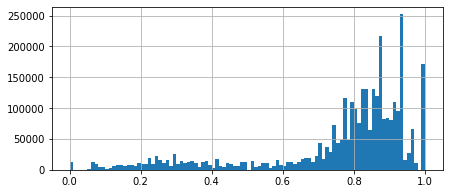

In [2]:
df_test['const_left'].hist(bins = 100, figsize = (7, 3))

In [3]:
rightEyeUpper0 = [246, 161, 160, 159, 158, 157, 173]
rightEyeLower0 = [33, 7, 163, 144, 145, 153, 154, 155, 133]


leftEyeUpper0 = [466, 388, 387, 386, 385, 384, 398]
leftEyeLower0 = [263, 249, 390, 373, 374, 380, 381, 382, 362]


midwayBetweenEyes = [168]

noseTip = [1]


In [27]:

rightEyeUpper0 = [246, 161, 160, 159, 158, 157, 173]
rightEyeLower0 = [33, 7, 163, 144, 145, 153, 154, 155, 133]
rightEyeUpper1 = [247, 30, 29, 27, 28, 56, 190]
rightEyeLower1 = [130, 25, 110, 24, 23, 22, 26, 112, 243]
rightEyeUpper2 = [113, 225, 224, 223, 222, 221, 189]
rightEyeLower2 = [226, 31, 228, 229, 230, 231, 232, 233, 244]
rightEyeLower3 = [143, 111, 117, 118, 119, 120, 121, 128, 245]

leftEyeUpper0 = [466, 388, 387, 386, 385, 384, 398]
leftEyeLower0 = [263, 249, 390, 373, 374, 380, 381, 382, 362]
leftEyeUpper1 = [467, 260, 259, 257, 258, 286, 414]
leftEyeLower1 = [359, 255, 339, 254, 253, 252, 256, 341, 463]
leftEyeUpper2 = [342, 445, 444, 443, 442, 441, 413]
leftEyeLower2 = [446, 261, 448, 449, 450, 451, 452, 453, 464]
leftEyeLower3 = [372, 340, 346, 347, 348, 349, 350, 357, 465]


924
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0108.jpg


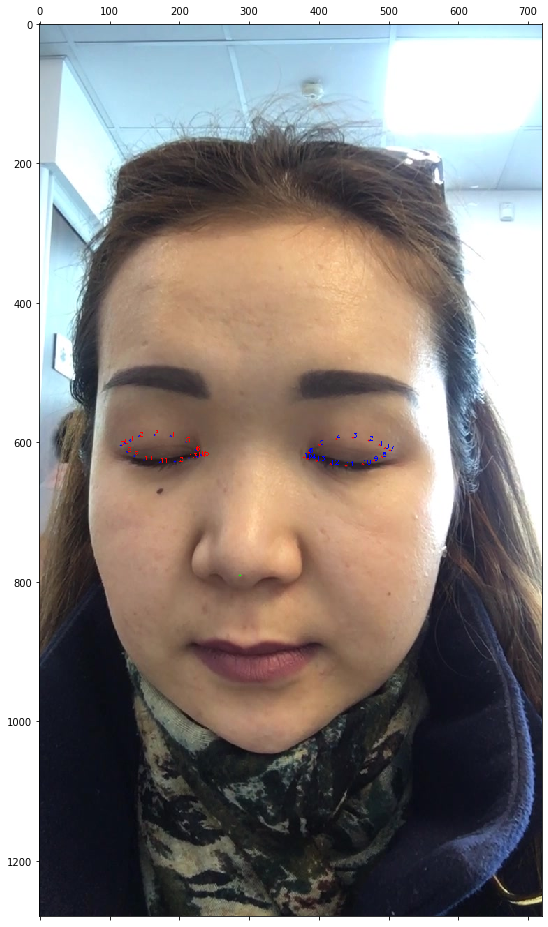

925
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0078.jpg


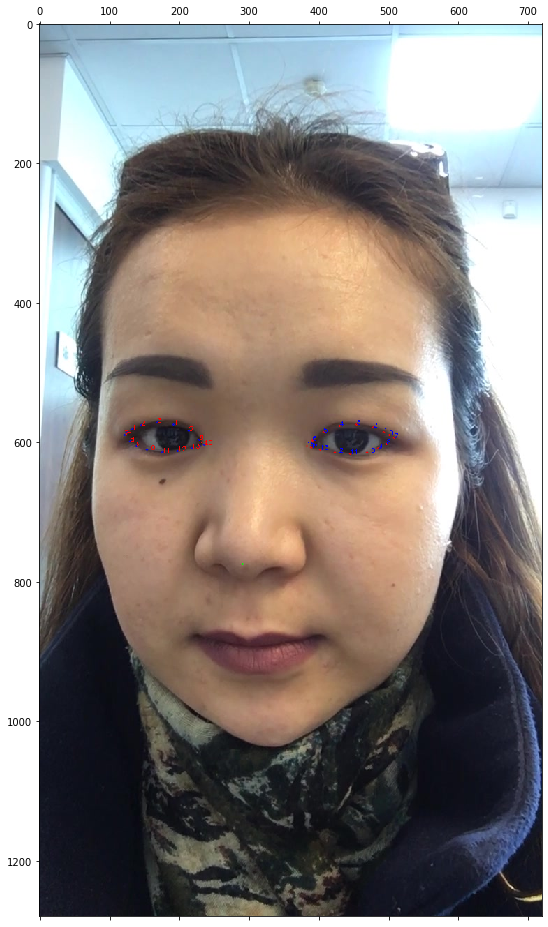

In [33]:
def check_landm(basename, left_eye, right_eye, centre_nose):
    plt.rcParams['figure.figsize'] = [500, 500]
    display = True

    color = (255, 0, 0)
    color2 = (0, 0, 255)
    color3 = (0, 255, 0)

    img = cv2.imread(basename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(len(left_eye)):
        p = tuple(left_eye[i])
        cv2.circle(img, p, 1, color, 1, cv2.LINE_AA)
        cv2.putText(img, str(i), p, cv2.FONT_HERSHEY_SIMPLEX, 0.3, color2, 1)

    for i in range(len(right_eye)):
        p = tuple(right_eye[i])
        cv2.circle(img, p, 1, color2, 1, cv2.LINE_AA)
        cv2.putText(img, str(i), p, cv2.FONT_HERSHEY_SIMPLEX, 0.3, color, 1)
    p = tuple(centre_nose)
    cv2.circle(img, p, 1, color3, 1, cv2.LINE_AA)
    if display:
        plt.matshow(img)
        plt.show()
shift = len('/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112')
src = '/mnt/data/frames/altyn_original_fps_igor_lndm_npy'
for index, row in df_test[924:926].iterrows():
    file = row['file']
    filename = '/mnt/data/frames/altyn_original_fps_igor' + file[shift:]
    npy_file=os.path.join(src, file.split('/')[-2] + '_' + file.split('/')[-1] + ".npy")
    print(index)
    print(file)
    data = np.load(npy_file)
    
    left_eye = []
    right_eye = []
    centre_nose = data[1][:2]

    for i in leftEyeUpper0+leftEyeLower0:
        left_eye.append(data[i][:2])
    for i in rightEyeUpper0+rightEyeLower0:
        right_eye.append(data[i][:2])
    """for i in leftEyeLower0:
        left_eye.append(data[i][:2])
    for i in rightEyeUpper0:
        right_eye.append(data[i][:2])"""
    #print('right_eye = ',right_eye)
    check_landm(filename, left_eye, right_eye, centre_nose)


In [18]:
import time
def eye_hw(data):
    def Euclidian_distant(xy1, xy2):
        return ((xy1[0]-xy2[0])**2+(xy1[1]-xy2[1])**2)**0.5

    rightEyeUpper0 = [246, 161, 160, 159, 158, 157, 173]
    rightEyeLower0 = [33, 7, 163, 144, 145, 153, 154, 155, 133]

    leftEyeUpper0 = [466, 388, 387, 386, 385, 384, 398]
    leftEyeLower0 = [263, 249, 390, 373, 374, 380, 381, 382, 362]

    left_eye = []
    right_eye = []
    left_eye_down = []
    right_eye_down = []
    centre_nose = data[1]

    for i in leftEyeUpper0:
        left_eye.append(data[i][:2])
    for i in rightEyeUpper0:
        right_eye.append(data[i][:2])
    for i in leftEyeLower0:
        left_eye_down.append(data[i][:2])
    for i in rightEyeLower0:
        right_eye_down.append(data[i][:2])

    left_eye_max_h = Euclidian_distant(left_eye[3], left_eye_down[4])
    left_eye_h = 1/7*(
                 Euclidian_distant(left_eye[0], left_eye_down[1])+
                 Euclidian_distant(left_eye[1], left_eye_down[2])+
                 Euclidian_distant(left_eye[2], left_eye_down[3])+
                 Euclidian_distant(left_eye[3], left_eye_down[4])+
                 Euclidian_distant(left_eye[4], left_eye_down[5])+
                 Euclidian_distant(left_eye[5], left_eye_down[6])+
                 Euclidian_distant(left_eye[6], left_eye_down[7]))
    left_eye_w = Euclidian_distant(left_eye_down[0], left_eye_down[8])

    right_eye_max_h = Euclidian_distant(right_eye[3], right_eye_down[4])    
    right_eye_h = 1/7*(
                 Euclidian_distant(right_eye[0], right_eye_down[1])+
                 Euclidian_distant(right_eye[1], right_eye_down[2])+
                 Euclidian_distant(right_eye[2], right_eye_down[3])+
                 Euclidian_distant(right_eye[3], right_eye_down[4])+
                 Euclidian_distant(right_eye[4], right_eye_down[5])+
                 Euclidian_distant(right_eye[5], right_eye_down[6])+
                 Euclidian_distant(right_eye[6], right_eye_down[7]))
    right_eye_w = Euclidian_distant(right_eye_down[0], right_eye_down[8])

    hw_left = [left_eye_max_h, left_eye_h, left_eye_w]                                  
    hw_right = [right_eye_max_h, right_eye_h, right_eye_w]  
    return hw_left, hw_right

def const_faces(df):
    shift = len('/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112')
    src = '/mnt/data/frames/altyn_original_fps_igor_lndm_npy'
    for index, row in df.iterrows():
        file = row['file']
        npy_file=os.path.join(src, file.split('/')[-2] + '_' + file.split('/')[-1] + ".npy")
        print(index)
        data = np.load(npy_file)
        
        #start_time = time.time()
        
        hw_left, hw_right = eye_hw(data)

        const_l = round(hw_left[1]/hw_left[2], 3)
        const_r = round(hw_right[1]/hw_right[2], 3)

        df.loc[index, 'const_left2'] = const_l
        df.loc[index, 'const_right2'] = const_r
        #print( '{}: {} ms'.format(index, int( (time.time() - start_time)*1000  ) ) )

    return df
df = const_faces(df_test[:1000])
df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232


/tmp/ipykernel_20982/3009006927.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'const_left2'] = const_l
/tmp/ipykernel_20982/3009006927.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'const_right2'] = const_r


233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482


file     blink  \
0    /mnt/data/frames/altyn_original_fps_igor_origa...  0.000002   
1    /mnt/data/frames/altyn_original_fps_igor_origa...  0.000003   
2    /mnt/data/frames/altyn_original_fps_igor_origa...  0.000003   
3    /mnt/data/frames/altyn_original_fps_igor_origa...  0.000011   
4    /mnt/data/frames/altyn_original_fps_igor_origa...  0.000007   
..                                                 ...       ...   
995  /mnt/data/frames/altyn_original_fps_igor_origa...  0.000015   
996  /mnt/data/frames/altyn_original_fps_igor_origa...  0.000021   
997  /mnt/data/frames/altyn_original_fps_igor_origa...  0.000012   
998  /mnt/data/frames/altyn_original_fps_igor_origa...  0.000013   
999  /mnt/data/frames/altyn_original_fps_igor_origa...  0.000017   

     bounding_box  bounding_box_center_x  bounding_box_center_x_deviation  \
0    14,26,98,110                     56                         0.000000   
1    13,27,97,111                     55                        -0.008929   
2    14,26,97,109                     55                        -0.004464   
3    13,28,95,110                     54                        -0.017857   
4    14,26,97,109                     55                        -0.004464   
..            ...                    ...                              ...   
995  6,20,102,112                     54                        -0.017857   
996  4,19,101,112                     52                        -0.031250   
997  6,20,102,112                     54                        -0.017857   
998  4,19,102,112                     53                        -0.026786   
999  5,21,101,112                     53                        -0.026786   

     bounding_box_center_y  bounding_box_center_y_deviation  \
0                       68                         0.107143   
1                       69                         0.116071   
2                       67                         0.102679   
3                       69                         0.116071   
4                       67                         0.102679   
..                     ...                              ...   
995                     66                         0.089286   
996                     65                         0.084821   
997                     66                         0.089286   
998                     65                         0.084821   
999                     66                         0.093750   

     bounding_box_height  bounding_box_height_relative  bounding_box_width  \
0                     84                      0.750000                  84   
1                     84                      0.750000                  84   
2                     83                      0.741071                  83   
3                     82                      0.732143                  82   
4                     83                      0.741071                  83   
..                   ...                           ...                 ...   
995                   92                      0.821429                  96   
996                   93                      0.830357                  97   
997                   92                      0.821429                  96   
998                   93                      0.830357                  98   
999                   91                      0.812500                  96   

     ...    object  sharpness     smile   up_down  width  const_left  \
0    ...  0.000339     0.6875  0.000292  0.214286    112    0.903226   
1    ...  0.000401     0.7500  0.000337  0.214286    112    0.935484   
2    ...  0.000548     0.6875  0.000237  0.228916    112    1.000000   
3    ...  0.002567     0.6875  0.000369  0.219512    112    0.838710   
4    ...  0.000317     0.6875  0.000229  0.228916    112    0.838710   
..   ...       ...        ...       ...       ...    ...         ...   
995  ...  0.000037     1.0000  0.000178  0.173913    112    0.931034   
996  ...  0.000046     1.0000  0.00026

In [19]:
#Просто делаем нормализацию констант для каждой группы картинок person_id по отдельности
person_id_previous=''
index_list = []
const_left_list = []
const_right_list = []
df = pd.concat([df, df[:1]], ignore_index=True, sort=False)

for index, row in df.iterrows():
    print(index)
    person_id = row['person_id']
    file = row['file']
    blink = row['blink']
    const_left = row['const_left2']
    const_right = row['const_right2']

    if person_id != person_id_previous:
        for i in range(len(const_left_list)):
            df.loc[index_list[i], 'const_left2'] = const_left_list[i]/(max(const_left_list)+0.000000000001)
            df.loc[index_list[i], 'const_right2'] = const_right_list[i]/(max(const_right_list)+0.000000000001)

        index_list = []
        const_left_list = []
        const_right_list = []
        person_id_previous = person_id
        
    const_left_list.append(const_left)
    const_right_list.append(const_right)
    index_list.append(index)
df = df[:-1]
df

0
person_id =  445493eb-d0fa-4670-b785-bb3d2e10082d
person_id_previous =  
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
person_id =  aee30bef-5446-440d-81dd-3baca3fc7e0c
person_id_previous =  445493eb-d0fa-4670-b785-bb3d2e10082d
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
max =  0.22
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


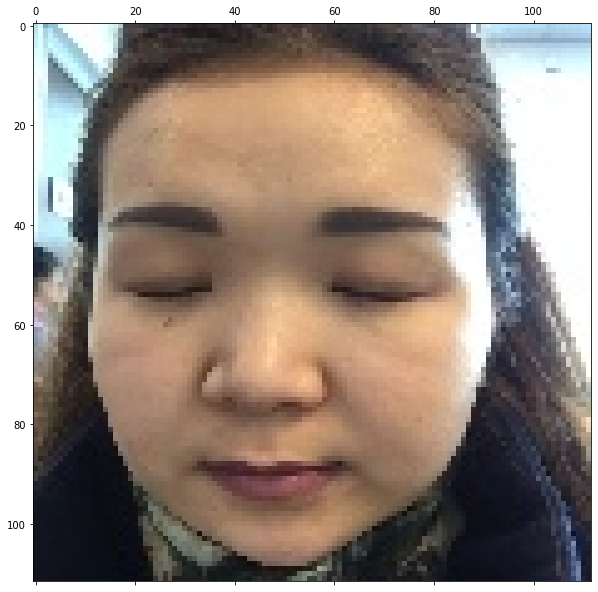

915
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0102.jpg
confidence =  0.0
blink =  1.0
const_left =  0.2068965517234245
const_right =  0.1428571428566326
const_left2 =  0.9385964912239535
const_right2 =  0.9306122448941608




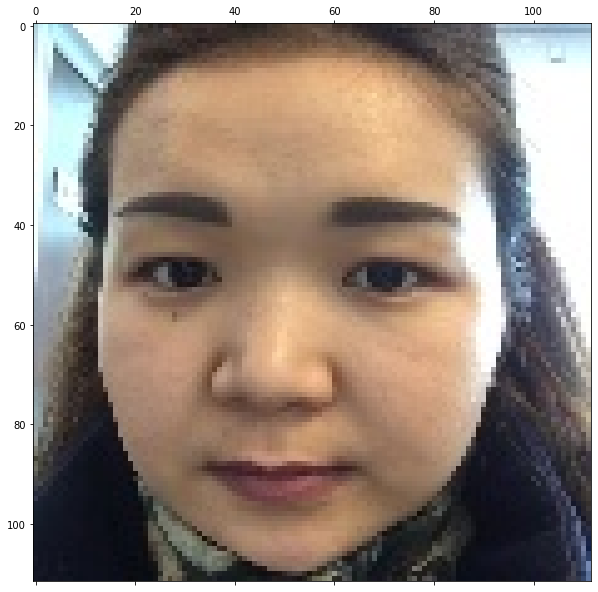

916
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0046.jpg
confidence =  0.54053277
blink =  1.5390495e-05
const_left =  0.8620689655142688
const_right =  0.8571428571397959
const_left2 =  0.9824561403465681
const_right2 =  0.9877551020367846




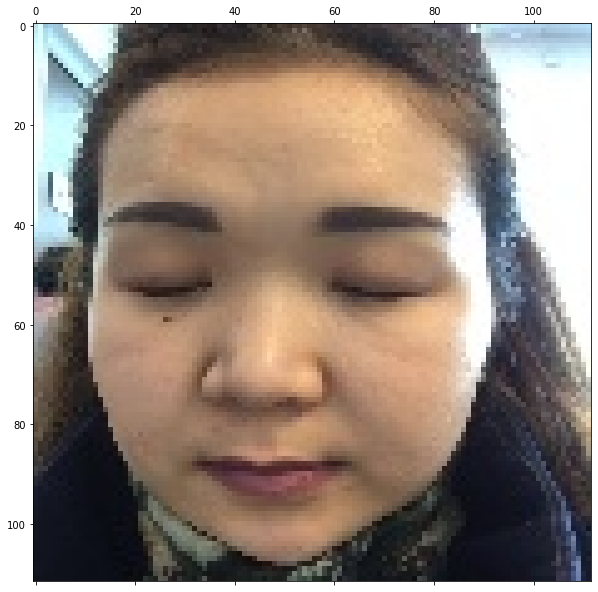

917
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0106.jpg
confidence =  0.0
blink =  1.0
const_left =  0.2068965517234245
const_right =  0.0714285714283163
const_left2 =  0.9298245613994305
const_right2 =  0.9020408163228488




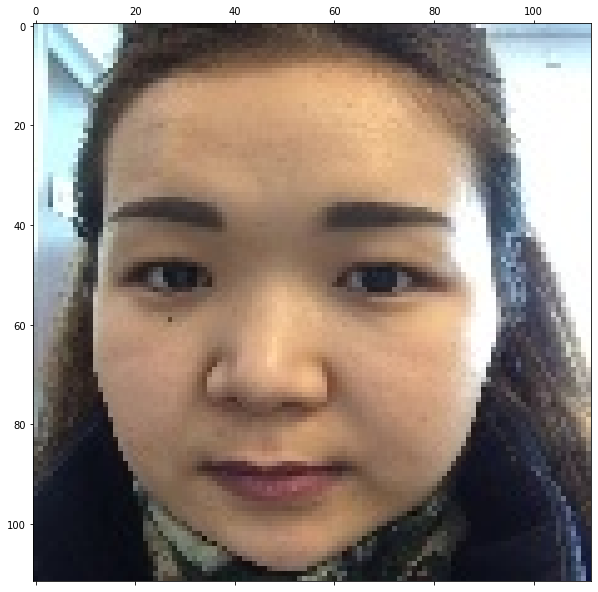

918
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0087.jpg
confidence =  0.55184275
blink =  1.182463e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9649122806975222
const_right2 =  0.9632653061185172




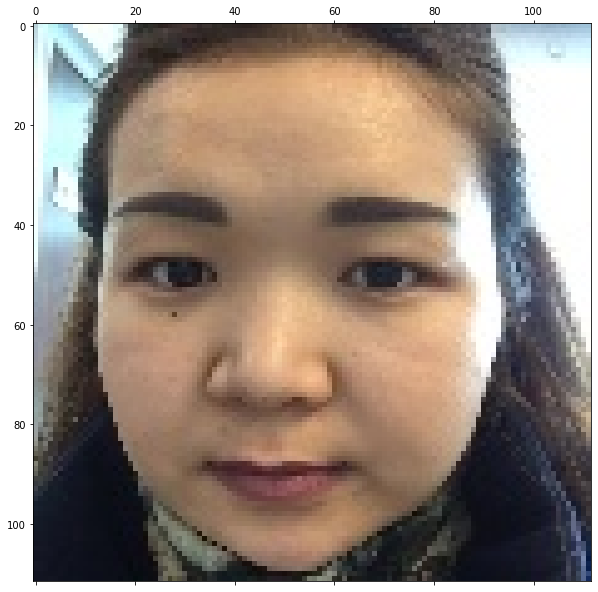

919
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0021.jpg
confidence =  0.52874213
blink =  1.29149075e-05
const_left =  0.8620689655142688
const_right =  0.8571428571397959
const_left2 =  0.9868421052588296
const_right2 =  0.9673469387715617




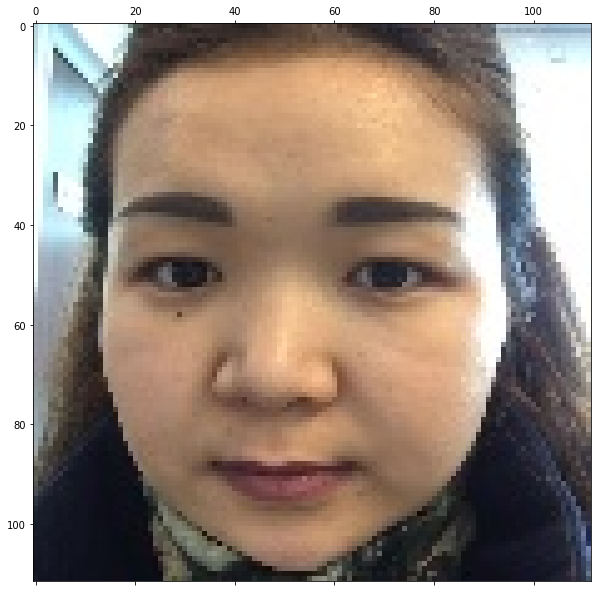

920
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0012.jpg
confidence =  0.5274631
blink =  8.468258e-06
const_left =  0.8620689655142688
const_right =  0.8214285714256377
const_left2 =  0.991228070171091
const_right2 =  0.9918367346898292




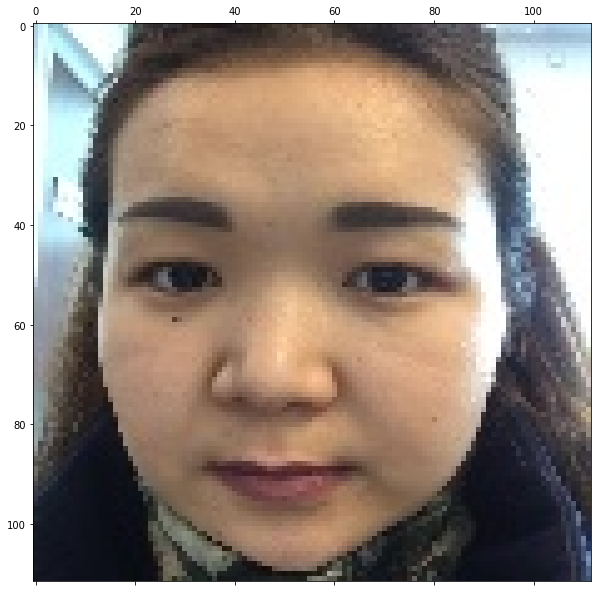

921
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0042.jpg
confidence =  0.5271946
blink =  1.48444105e-05
const_left =  0.9310344827554105
const_right =  0.8214285714256377
const_left2 =  0.9692982456097837
const_right2 =  0.9510204081593836




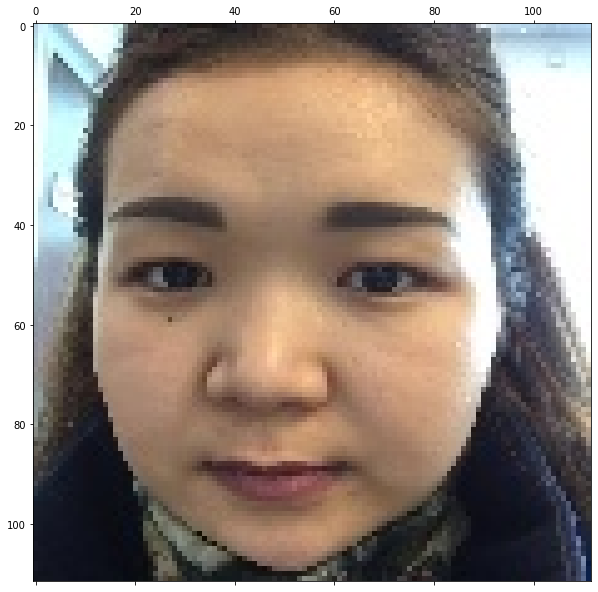

922
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0051.jpg
confidence =  0.5311489
blink =  2.1601847e-05
const_left =  0.9310344827554105
const_right =  0.9999999999964286
const_left2 =  0.9736842105220452
const_right2 =  0.9632653061185172




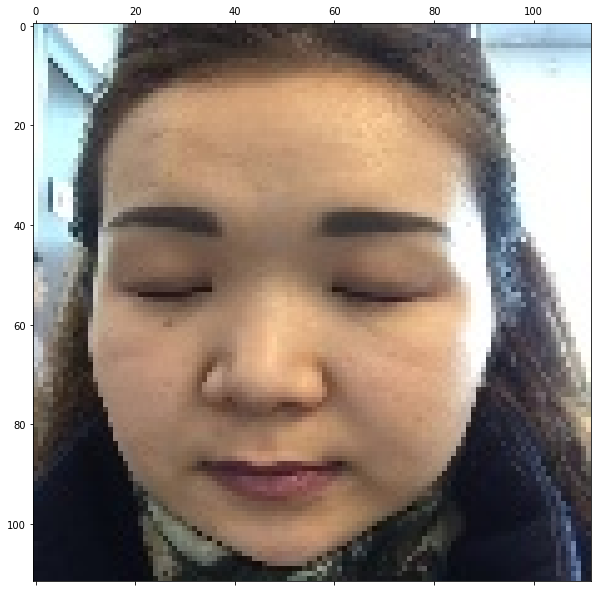

923
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0100.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0689655172411415
const_right =  0.1071428571424744
const_left2 =  0.9122807017503847
const_right2 =  0.9183673469350271




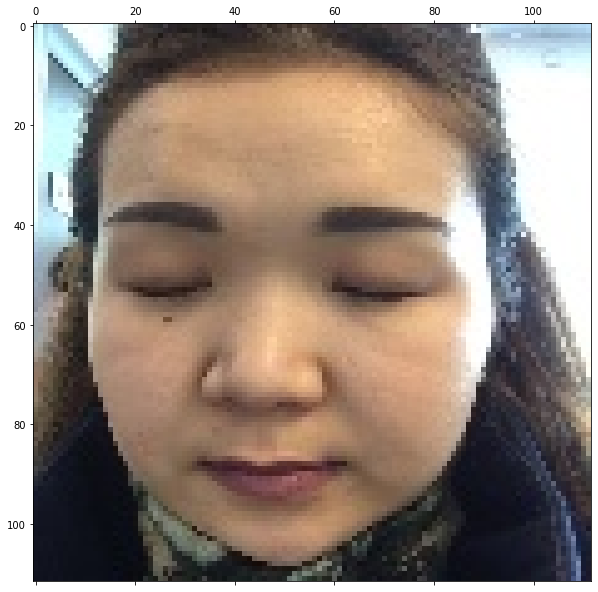

924
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0108.jpg
confidence =  0.0
blink =  1.0
const_left =  0.2068965517234245
const_right =  0.0714285714283163
const_left2 =  0.9254385964871691
const_right2 =  0.910204081628938




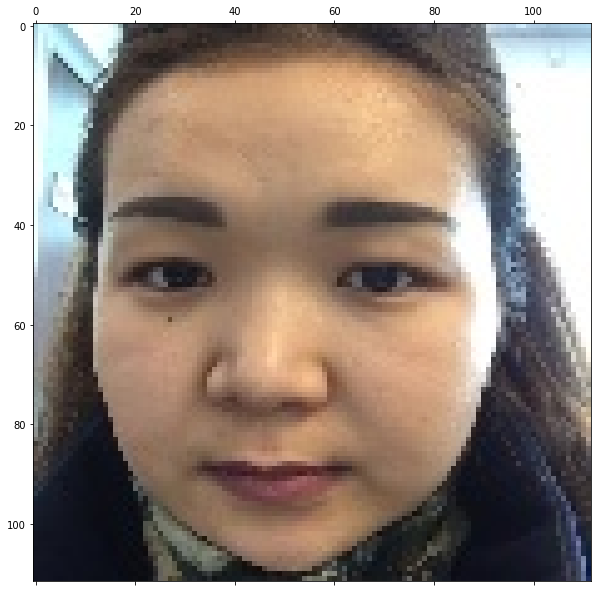

925
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0078.jpg
confidence =  0.5362488
blink =  2.5938747e-05
const_left =  0.9310344827554105
const_right =  0.7857142857114796
const_left2 =  0.9605263157852608
const_right2 =  0.9673469387715617




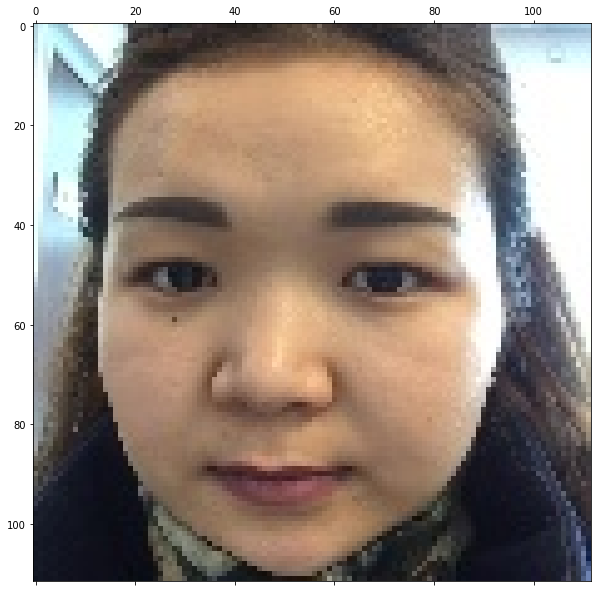

926
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0018.jpg
confidence =  0.52899426
blink =  2.1124222e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9649122806975222
const_right2 =  0.9591836734654726




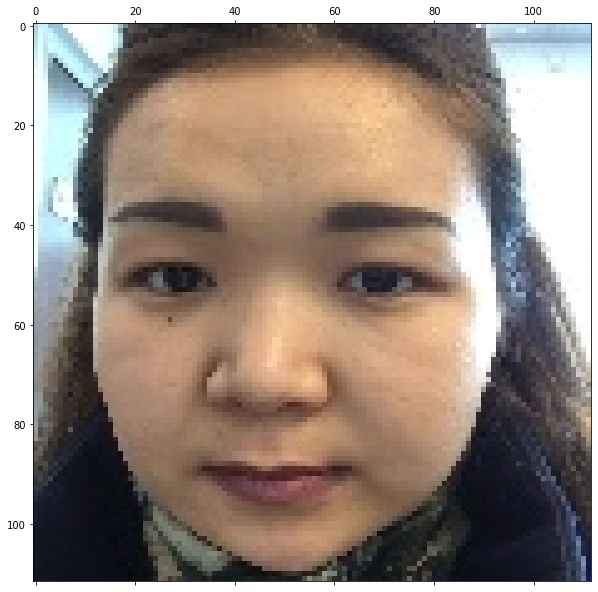

927
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0080.jpg
confidence =  0.53892726
blink =  3.226964e-05
const_left =  0.7931034482731274
const_right =  0.7857142857114796
const_left2 =  0.9692982456097837
const_right2 =  0.9510204081593836




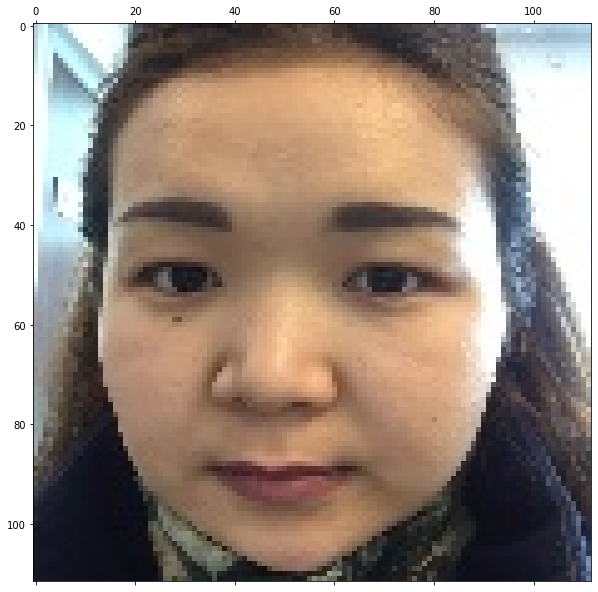

928
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0014.jpg
confidence =  0.54690015
blink =  1.0170726e-05
const_left =  0.8620689655142688
const_right =  0.7857142857114796
const_left2 =  0.9824561403465681
const_right2 =  0.9632653061185172




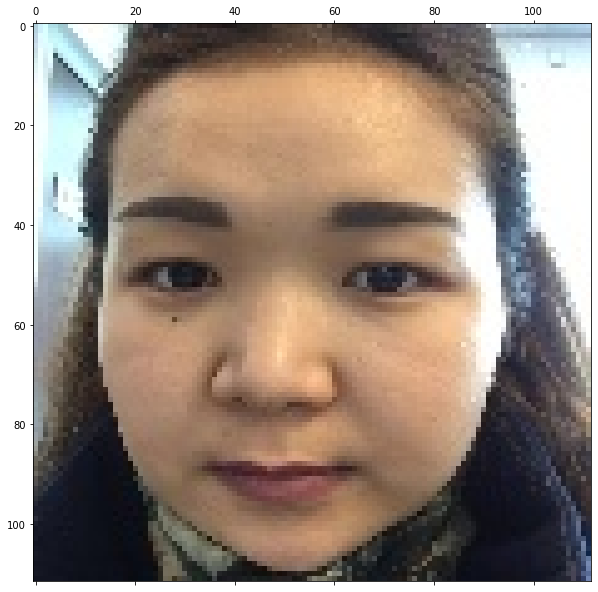

929
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0015.jpg
confidence =  0.52048147
blink =  1.6793289e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9780701754343066
const_right2 =  0.9591836734654726




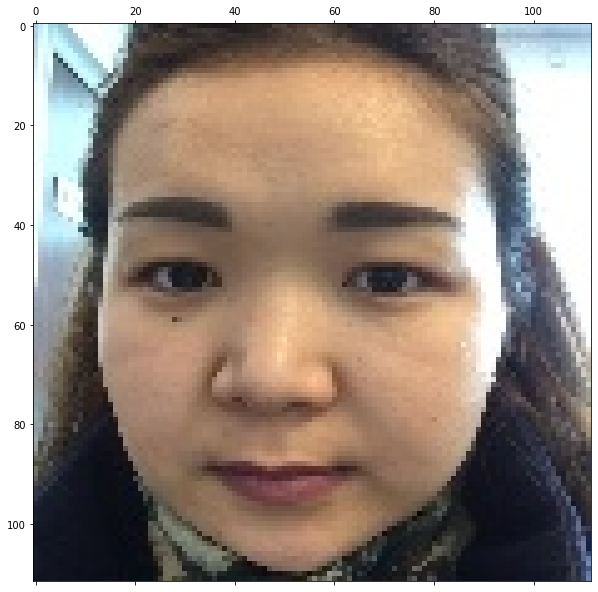

930
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0035.jpg
confidence =  0.5232127
blink =  1.4142106e-05
const_left =  0.9310344827554105
const_right =  0.8214285714256377
const_left2 =  0.9824561403465681
const_right2 =  0.9714285714246064




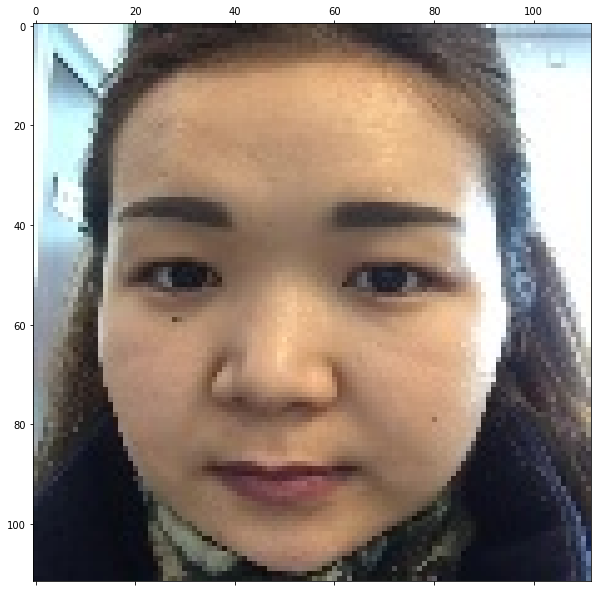

931
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0041.jpg
confidence =  0.531365
blink =  1.2485218e-05
const_left =  0.9310344827554105
const_right =  0.8928571428539541
const_left2 =  0.9736842105220452
const_right2 =  0.9632653061185172




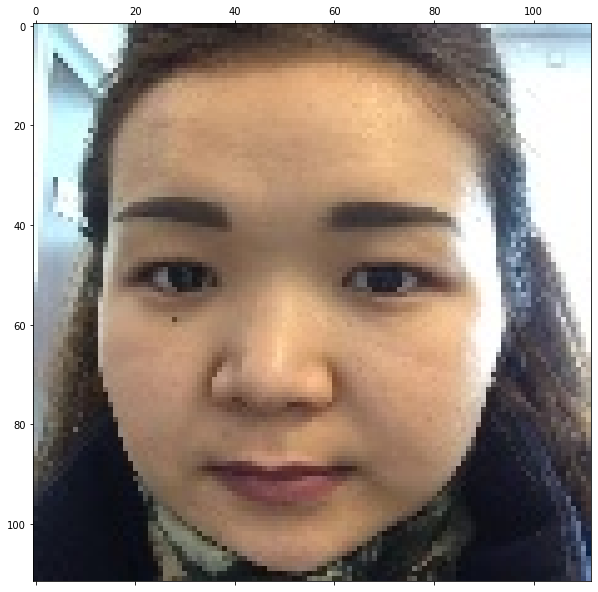

932
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0017.jpg
confidence =  0.5297405
blink =  1.48362315e-05
const_left =  0.9310344827554105
const_right =  0.8928571428539541
const_left2 =  0.9649122806975222
const_right2 =  0.9591836734654726




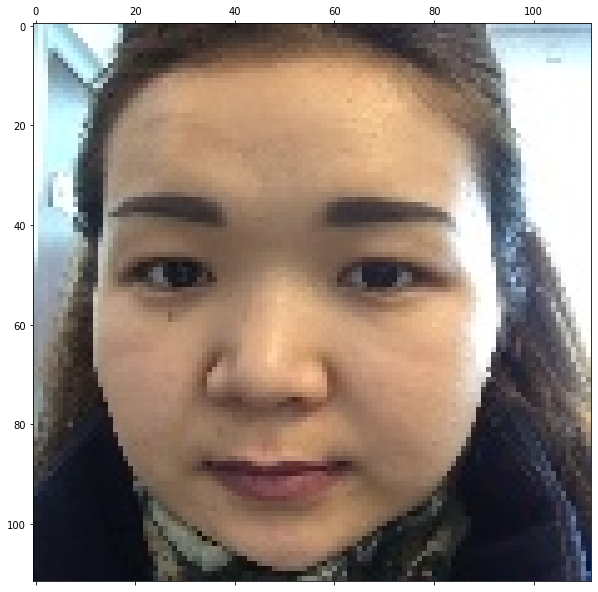

933
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0082.jpg
confidence =  0.5041528
blink =  1.953274e-05
const_left =  0.8620689655142688
const_right =  0.8214285714256377
const_left2 =  0.9692982456097837
const_right2 =  0.9632653061185172




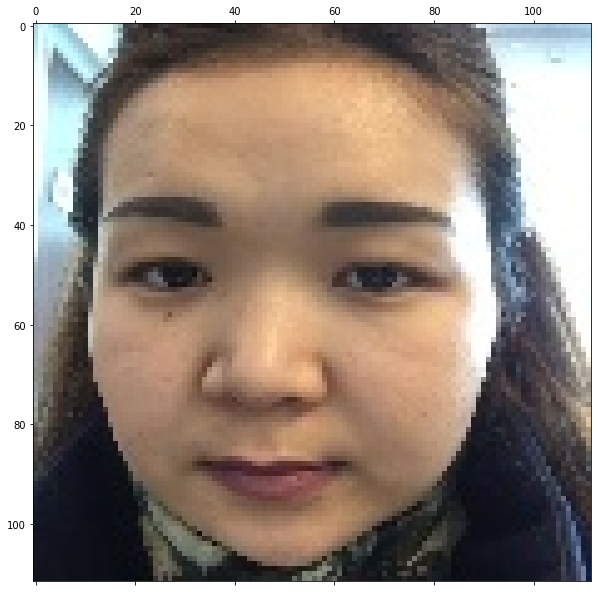

934
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0074.jpg
confidence =  0.53059673
blink =  2.2374157e-05
const_left =  0.9310344827554105
const_right =  0.7857142857114796
const_left2 =  0.9649122806975222
const_right2 =  0.9632653061185172




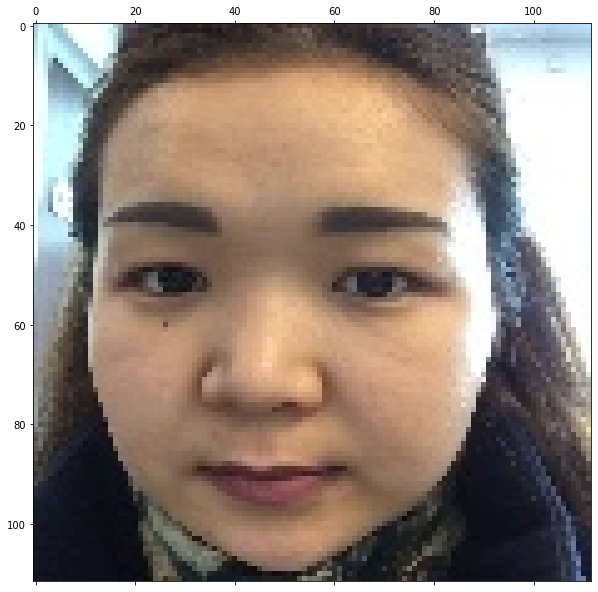

935
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0061.jpg
confidence =  0.4951944
blink =  3.9164737e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9605263157852608
const_right2 =  0.9551020408124282




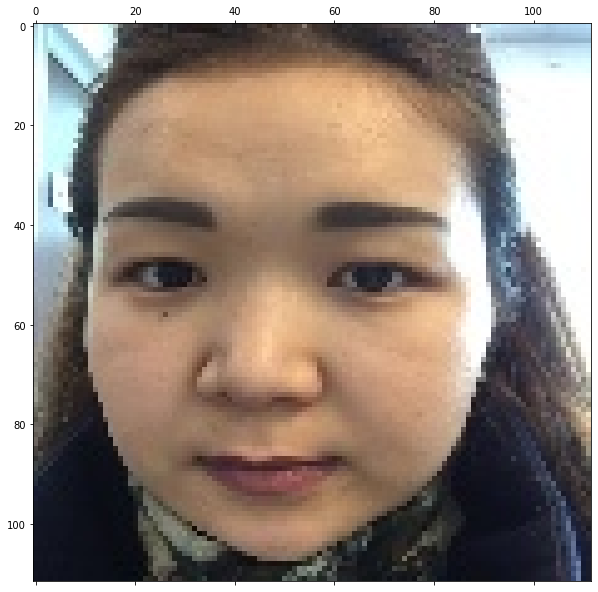

936
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0064.jpg
confidence =  0.48770684
blink =  2.0649635e-05
const_left =  0.9310344827554105
const_right =  0.8214285714256377
const_left2 =  0.934210526311692
const_right2 =  0.9346938775472053




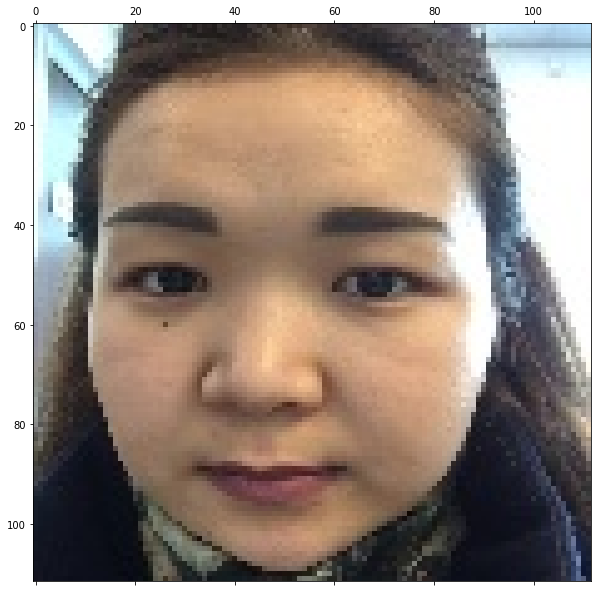

937
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0059.jpg
confidence =  0.48730808
blink =  4.4435597e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9605263157852608
const_right2 =  0.9510204081593836




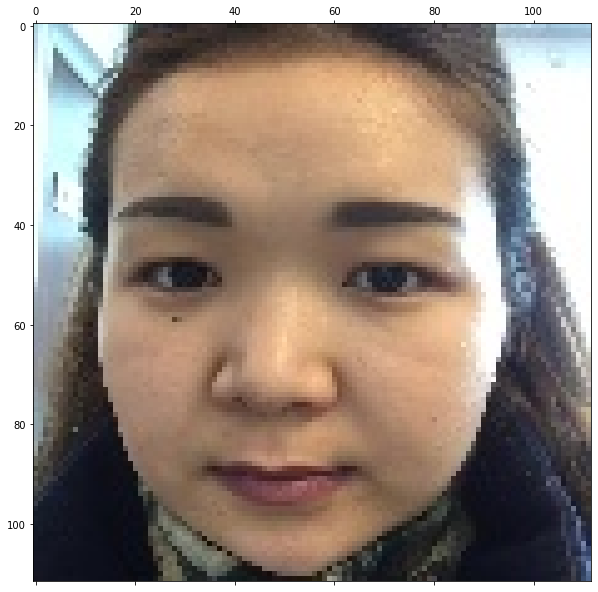

938
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0038.jpg
confidence =  0.5335869
blink =  1.2541976e-05
const_left =  0.9310344827554105
const_right =  0.9642857142822704
const_left2 =  0.9649122806975222
const_right2 =  0.9591836734654726




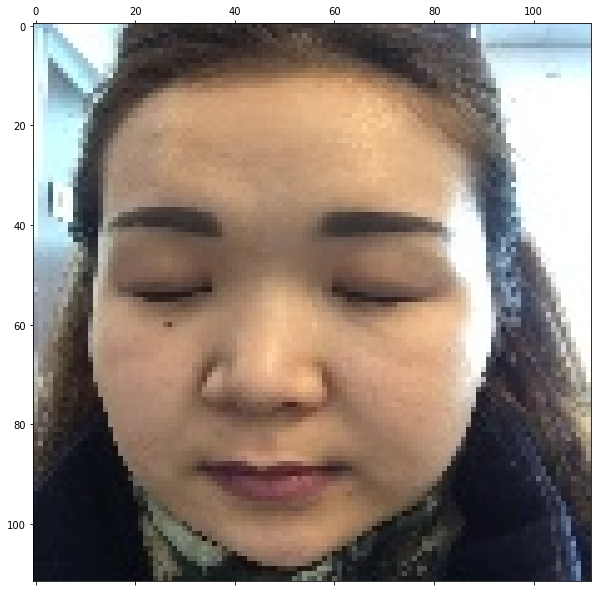

939
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0099.jpg
confidence =  0.0
blink =  1.0
const_left =  0.2068965517234245
const_right =  0.1428571428566326
const_left2 =  0.9385964912239535
const_right2 =  0.9265306122411162




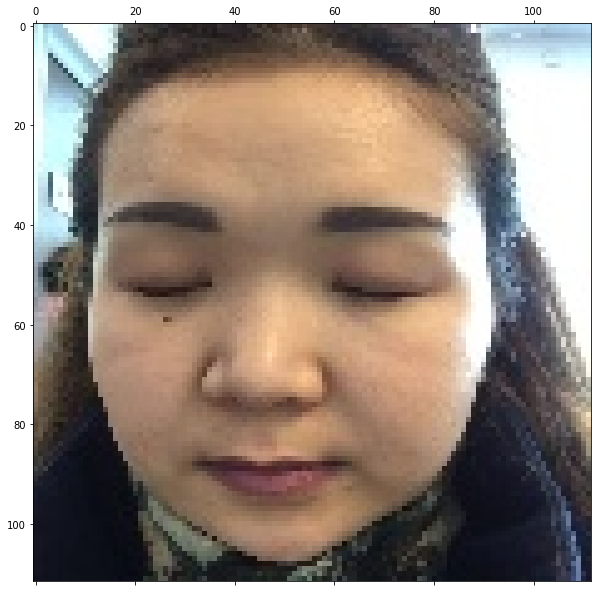

940
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0107.jpg
confidence =  0.0
blink =  1.0
const_left =  0.2068965517234245
const_right =  0.0714285714283163
const_left2 =  0.9210526315749076
const_right2 =  0.9061224489758933




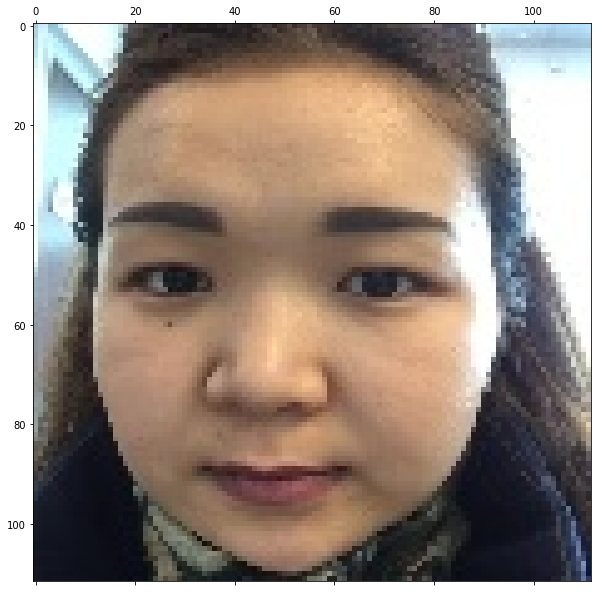

941
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0054.jpg
confidence =  0.5119634
blink =  5.257932e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9824561403465681
const_right2 =  0.9551020408124282




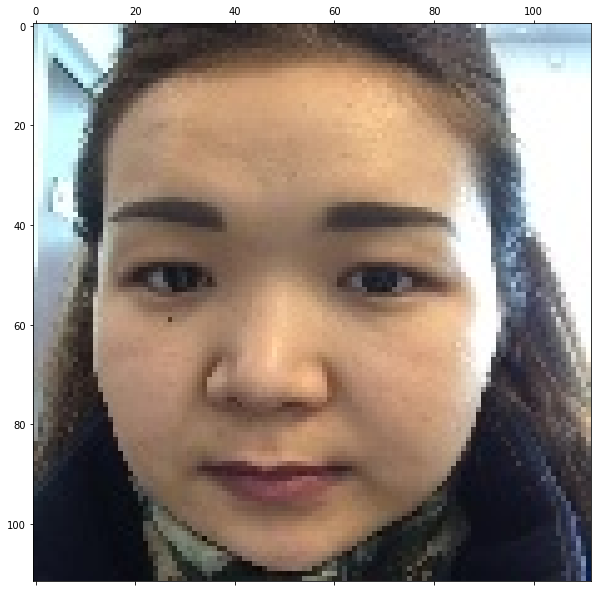

942
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0079.jpg
confidence =  0.5368028
blink =  2.1860522e-05
const_left =  0.8620689655142688
const_right =  0.7857142857114796
const_left2 =  0.9692982456097837
const_right2 =  0.9469387755063391




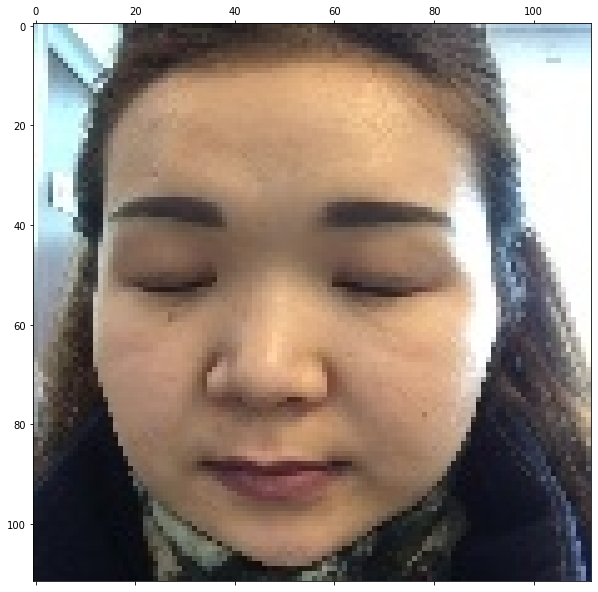

943
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0093.jpg
confidence =  0.0
blink =  1.0
const_left =  0.2068965517234245
const_right =  0.0714285714283163
const_left2 =  0.9254385964871691
const_right2 =  0.9306122448941608




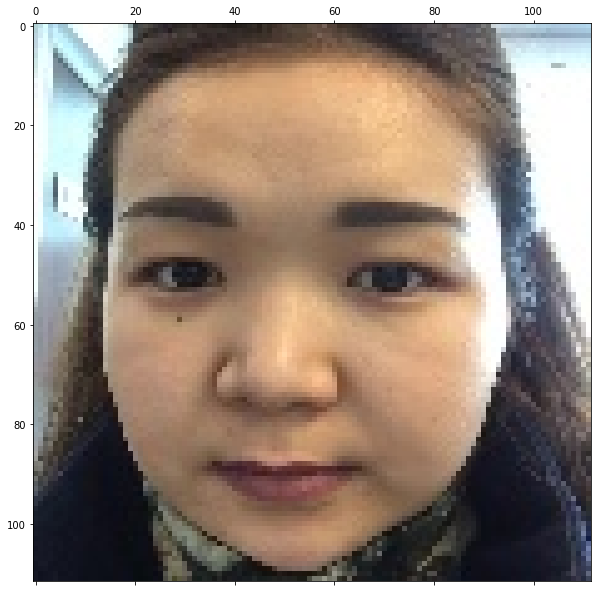

944
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0006.jpg
confidence =  0.5495801
blink =  9.820893e-06
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9824561403465681
const_right2 =  0.9714285714246064




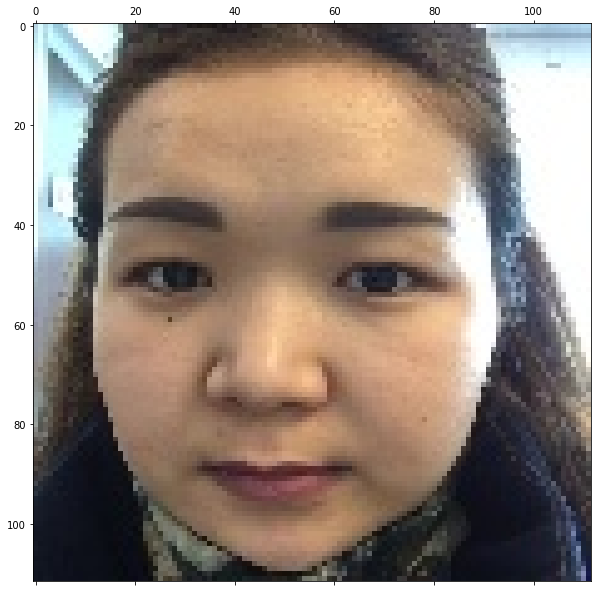

945
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0085.jpg
confidence =  0.5376602
blink =  1.216501e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9649122806975222
const_right2 =  0.9591836734654726




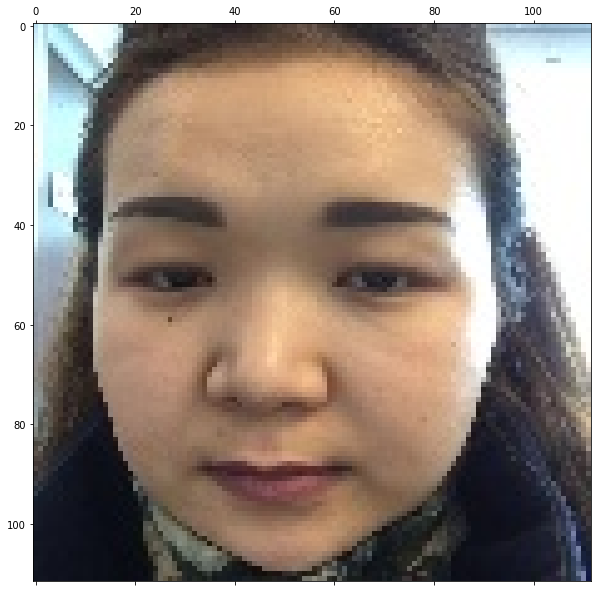

946
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0089.jpg
confidence =  0.51602536
blink =  0.00020982226
const_left =  0.6551724137908443
const_right =  0.6428571428548469
const_left2 =  0.9692982456097837
const_right2 =  0.9551020408124282




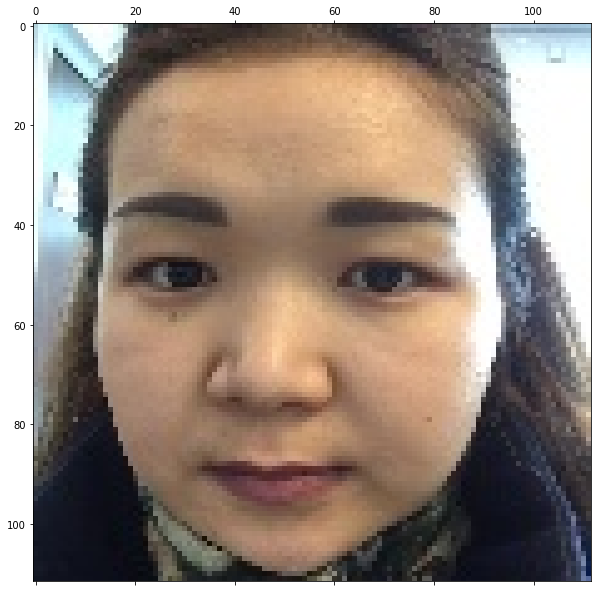

947
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0026.jpg
confidence =  0.5118824
blink =  2.9002373e-05
const_left =  0.9310344827554105
const_right =  0.8571428571397959
const_left2 =  0.9692982456097837
const_right2 =  0.9591836734654726




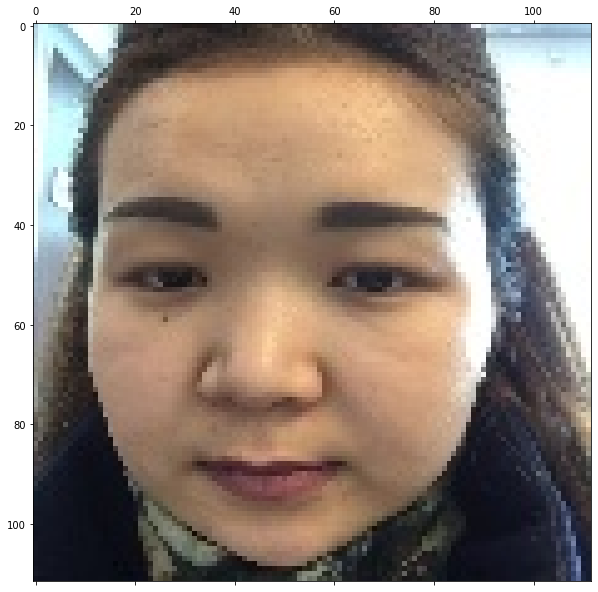

948
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0067.jpg
confidence =  0.50041276
blink =  0.000110705405
const_left =  0.7241379310319858
const_right =  0.6428571428548469
const_left2 =  0.9561403508729993
const_right2 =  0.9346938775472053




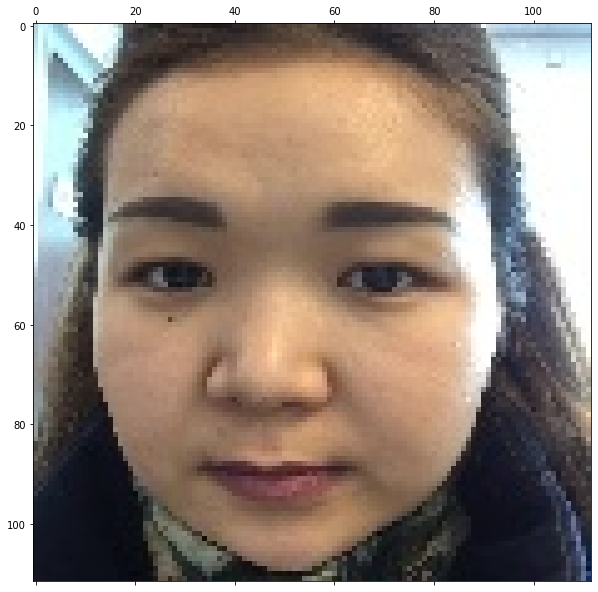

949
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0081.jpg
confidence =  0.52937424
blink =  2.3603074e-05
const_left =  0.9310344827554105
const_right =  0.7857142857114796
const_left2 =  0.9692982456097837
const_right2 =  0.9714285714246064




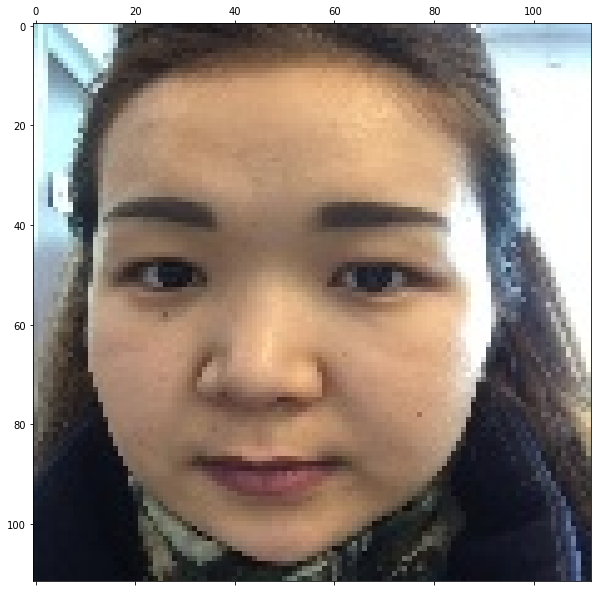

950
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0063.jpg
confidence =  0.522542
blink =  1.9164761e-05
const_left =  0.9310344827554105
const_right =  0.7857142857114796
const_left2 =  0.9385964912239535
const_right2 =  0.9469387755063391




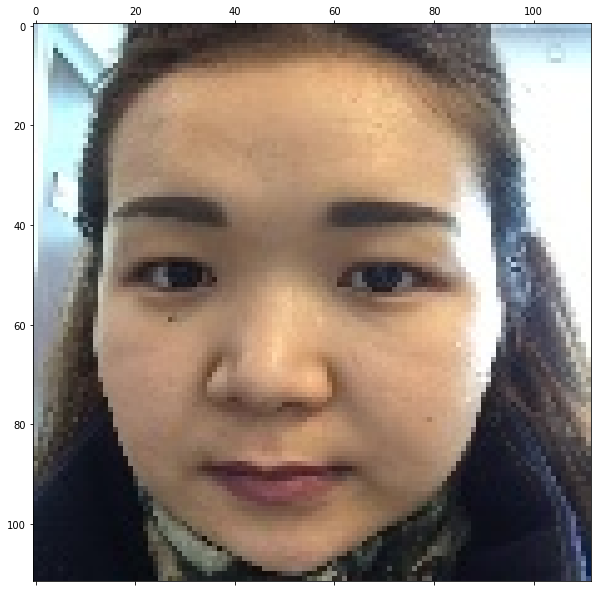

951
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0025.jpg
confidence =  0.53590673
blink =  2.9583514e-05
const_left =  0.9310344827554105
const_right =  0.8928571428539541
const_left2 =  0.9605263157852608
const_right2 =  0.9632653061185172




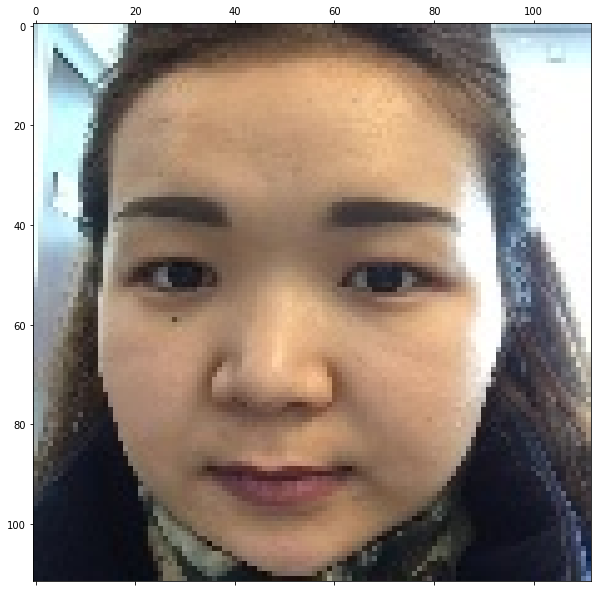

952
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0019.jpg
confidence =  0.5229873
blink =  3.4034034e-05
const_left =  0.9999999999965518
const_right =  0.9285714285681124
const_left2 =  0.9649122806975222
const_right2 =  0.9510204081593836




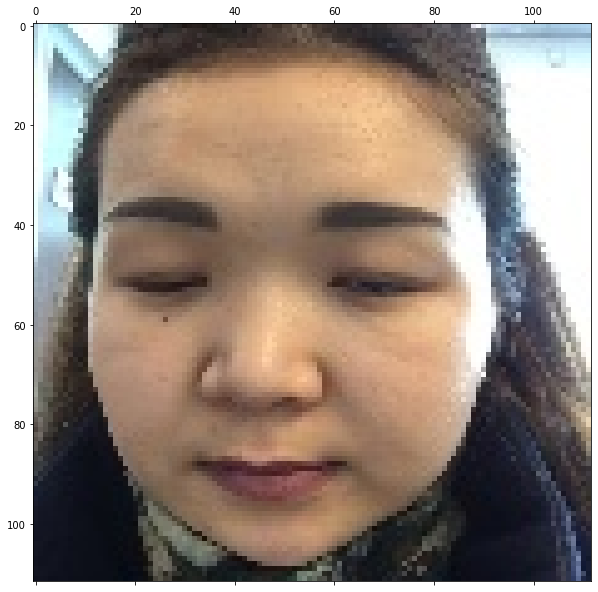

953
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0068.jpg
confidence =  0.0
blink =  0.9999999
const_left =  0.2068965517234245
const_right =  0.2857142857132653
const_left2 =  0.9298245613994305
const_right2 =  0.9265306122411162




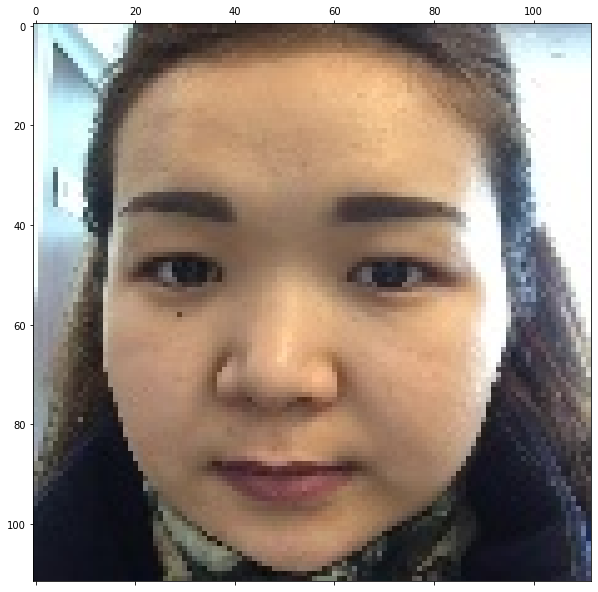

954
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0008.jpg
confidence =  0.5561248
blink =  9.472303e-06
const_left =  0.9310344827554105
const_right =  0.9999999999964286
const_left2 =  0.9999999999956141
const_right2 =  0.9714285714246064




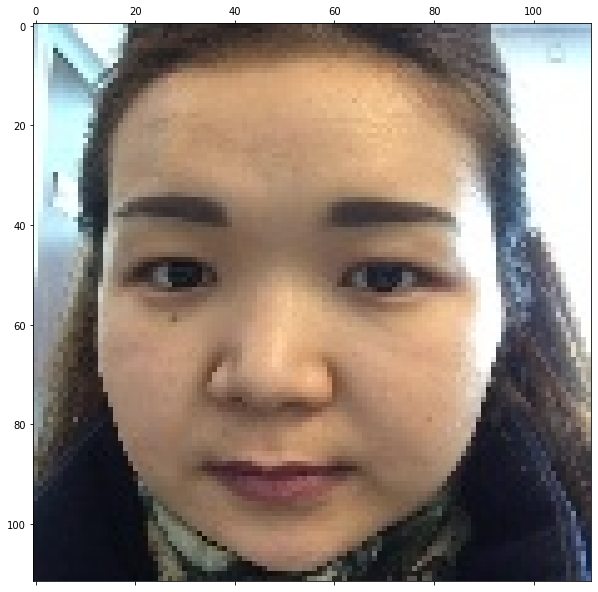

955
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0027.jpg
confidence =  0.5232661
blink =  2.5235622e-05
const_left =  0.9310344827554105
const_right =  0.8571428571397959
const_left2 =  0.9868421052588296
const_right2 =  0.9673469387715617




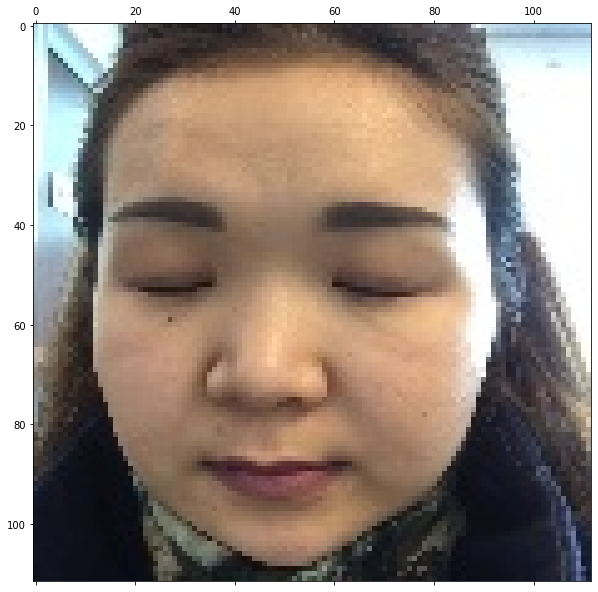

956
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0096.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0689655172411415
const_right =  0.1785714285707908
const_left2 =  0.9385964912239535
const_right2 =  0.9346938775472053




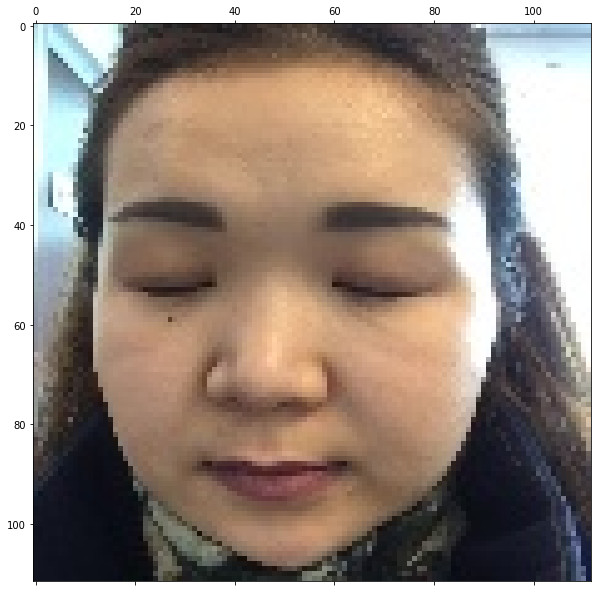

957
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0094.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0689655172411415
const_right =  0.0714285714283163
const_left2 =  0.9254385964871691
const_right2 =  0.9265306122411162




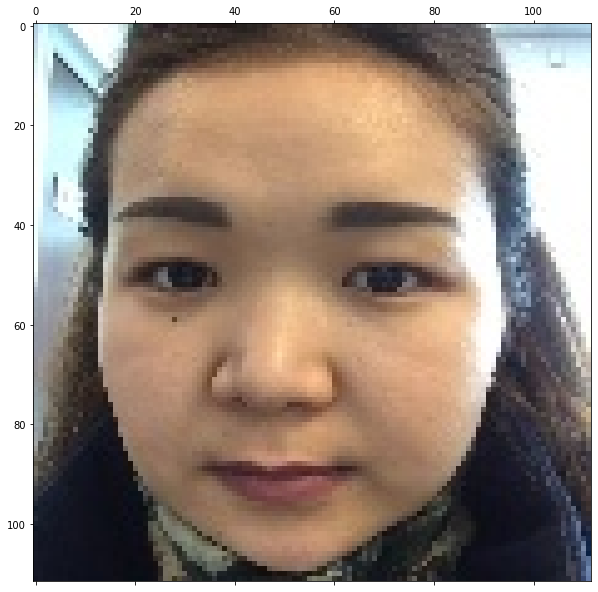

958
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0016.jpg
confidence =  0.5217698
blink =  1.6195936e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9692982456097837
const_right2 =  0.9591836734654726




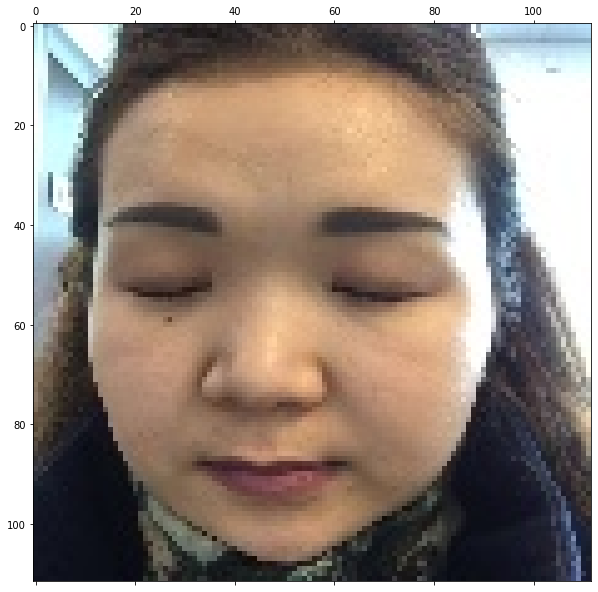

959
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0109.jpg
confidence =  0.0
blink =  1.0
const_left =  0.137931034482283
const_right =  0.1428571428566326
const_left2 =  0.9210526315749076
const_right2 =  0.9061224489758933




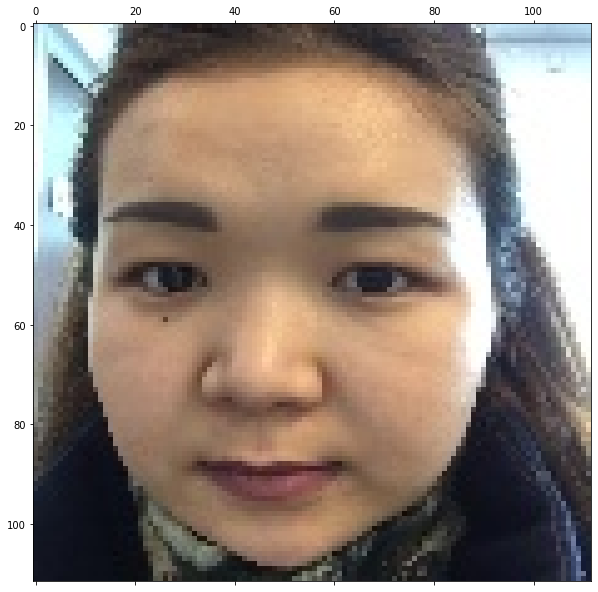

960
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0062.jpg
confidence =  0.48203337
blink =  1.9411904e-05
const_left =  0.8620689655142688
const_right =  0.8571428571397959
const_left2 =  0.9517543859607378
const_right2 =  0.9428571428532945




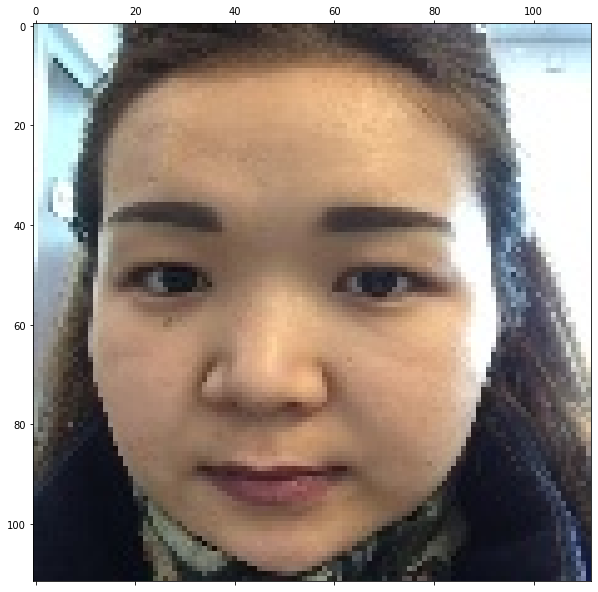

961
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0057.jpg
confidence =  0.5033928
blink =  3.302507e-05
const_left =  0.9310344827554105
const_right =  0.7857142857114796
const_left2 =  0.9649122806975222
const_right2 =  0.9469387755063391




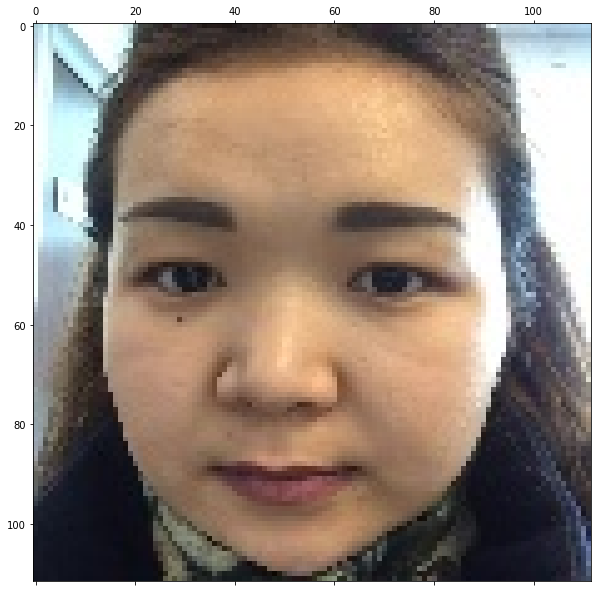

962
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0003.jpg
confidence =  0.532463
blink =  1.3649922e-05
const_left =  0.9310344827554105
const_right =  0.8571428571397959
const_left2 =  0.9692982456097837
const_right2 =  0.9632653061185172




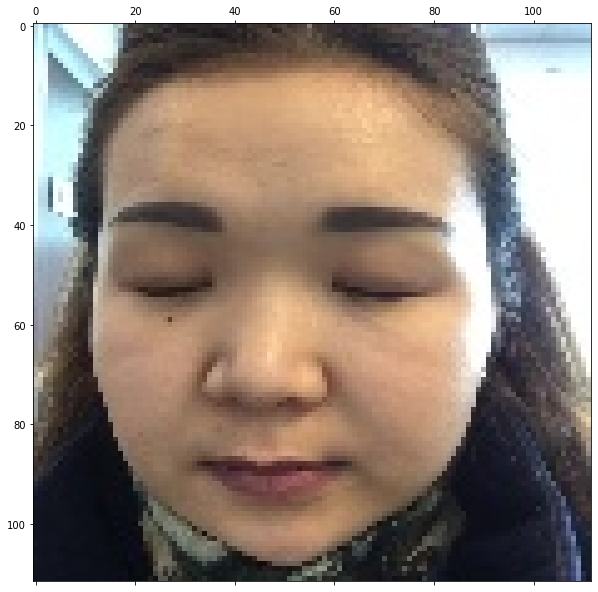

963
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0098.jpg
confidence =  0.0
blink =  1.0
const_left =  0.137931034482283
const_right =  0.0714285714283163
const_left2 =  0.9254385964871691
const_right2 =  0.9265306122411162




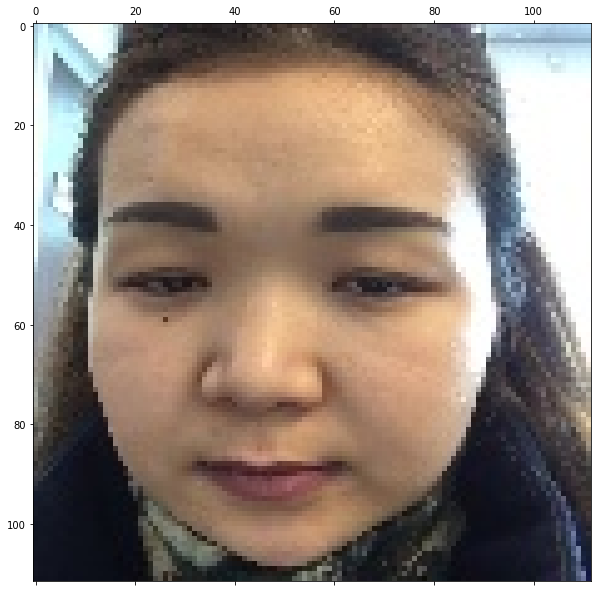

964
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0070.jpg
confidence =  0.43032208
blink =  0.12701257
const_left =  0.5172413793085613
const_right =  0.5714285714265306
const_left2 =  0.9298245613994305
const_right2 =  0.9306122448941608




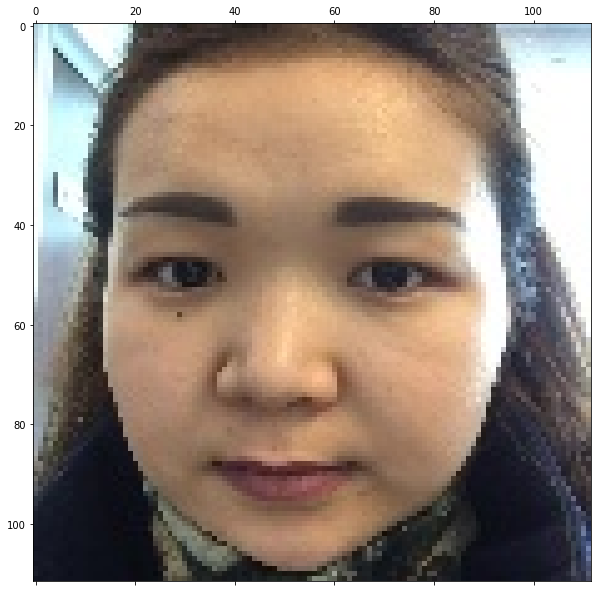

965
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0007.jpg
confidence =  0.5464703
blink =  9.024308e-06
const_left =  0.8620689655142688
const_right =  0.9285714285681124
const_left2 =  0.9736842105220452
const_right2 =  0.9836734693837401




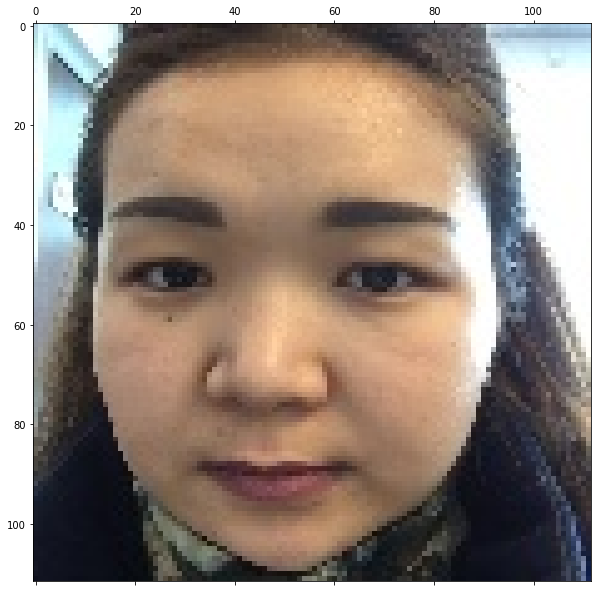

966
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0077.jpg
confidence =  0.539028
blink =  2.0712709e-05
const_left =  0.9310344827554105
const_right =  0.8571428571397959
const_left2 =  0.9824561403465681
const_right2 =  0.9673469387715617




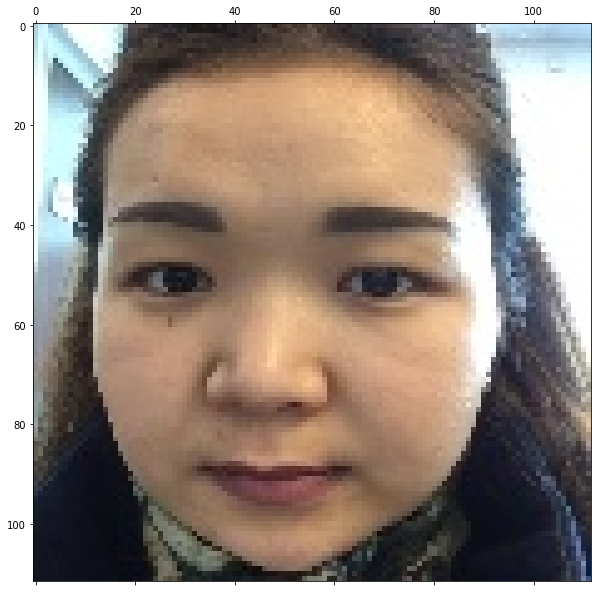

967
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0053.jpg
confidence =  0.5249041
blink =  3.881571e-05
const_left =  0.9999999999965518
const_right =  0.9285714285681124
const_left2 =  0.9605263157852608
const_right2 =  0.9428571428532945




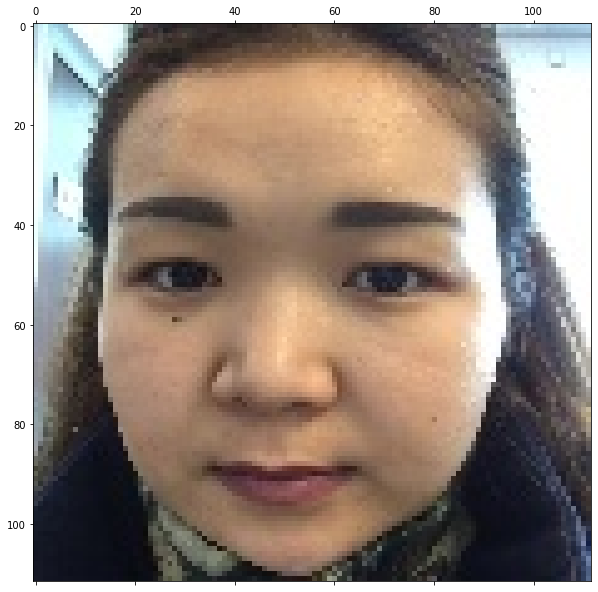

968
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0039.jpg
confidence =  0.5288304
blink =  1.19188935e-05
const_left =  0.9310344827554105
const_right =  0.9642857142822704
const_left2 =  0.9736842105220452
const_right2 =  0.9632653061185172




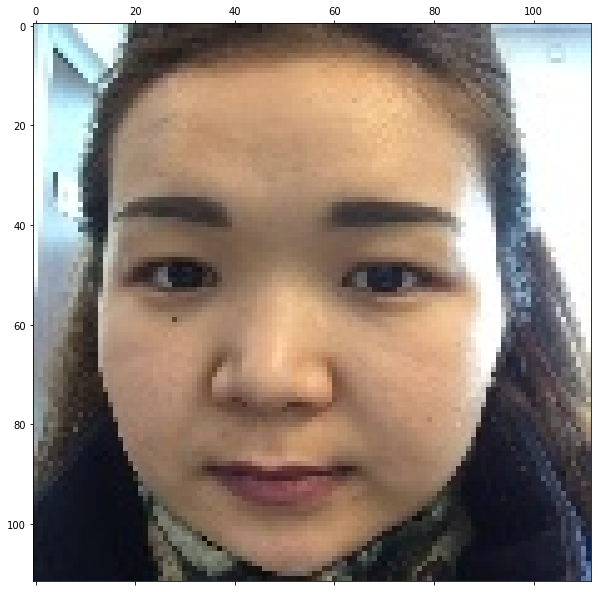

969
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0028.jpg
confidence =  0.48641694
blink =  2.3744335e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9780701754343066
const_right2 =  0.9591836734654726




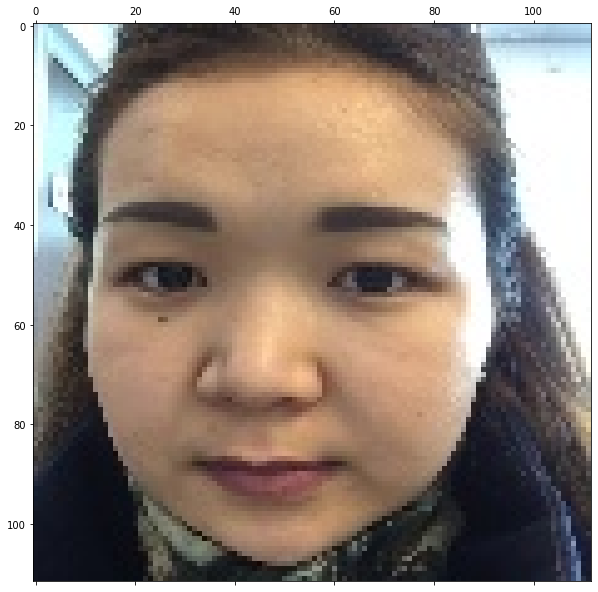

970
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0066.jpg
confidence =  0.5313865
blink =  1.3520754e-05
const_left =  0.8620689655142688
const_right =  0.8571428571397959
const_left2 =  0.9429824561362149
const_right2 =  0.9346938775472053




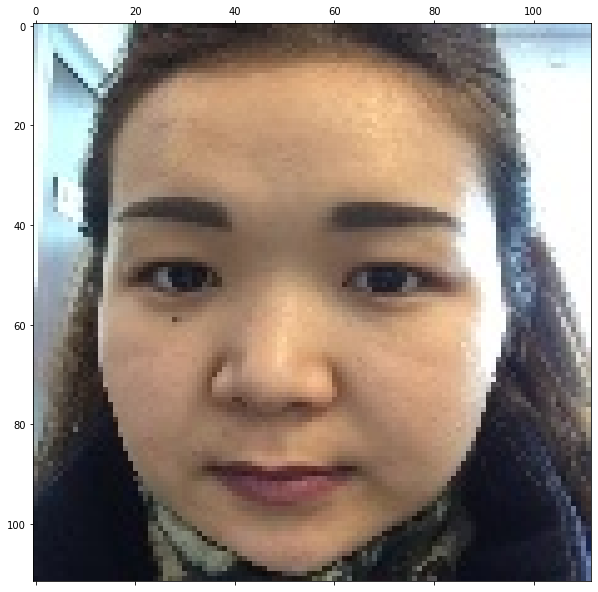

971
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0033.jpg
confidence =  0.51363933
blink =  1.36121325e-05
const_left =  0.9310344827554105
const_right =  0.8214285714256377
const_left2 =  0.9692982456097837
const_right2 =  0.9510204081593836




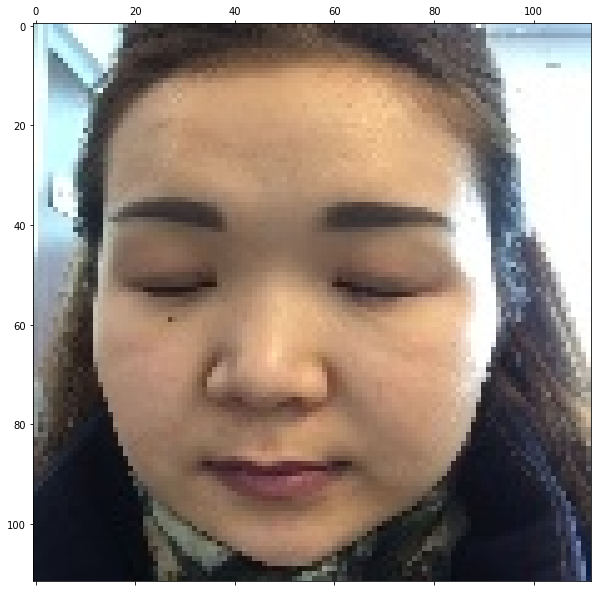

972
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0092.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0689655172411415
const_right =  0.1428571428566326
const_left2 =  0.9254385964871691
const_right2 =  0.9346938775472053




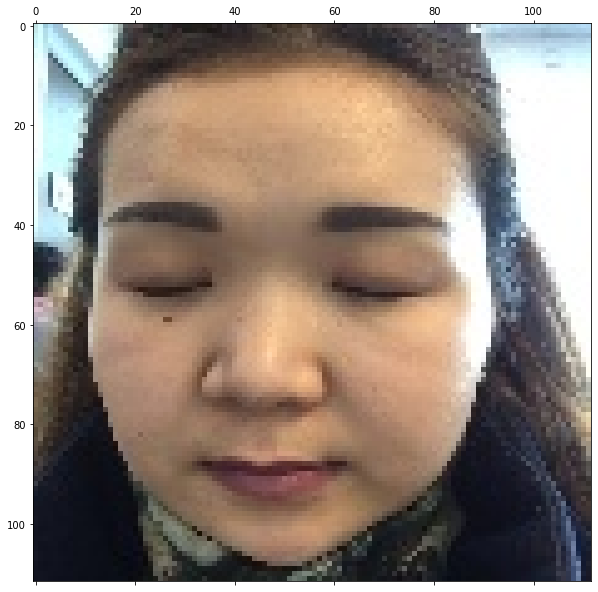

973
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0103.jpg
confidence =  0.0
blink =  1.0
const_left =  0.2068965517234245
const_right =  0.0714285714283163
const_left2 =  0.9385964912239535
const_right2 =  0.9224489795880717




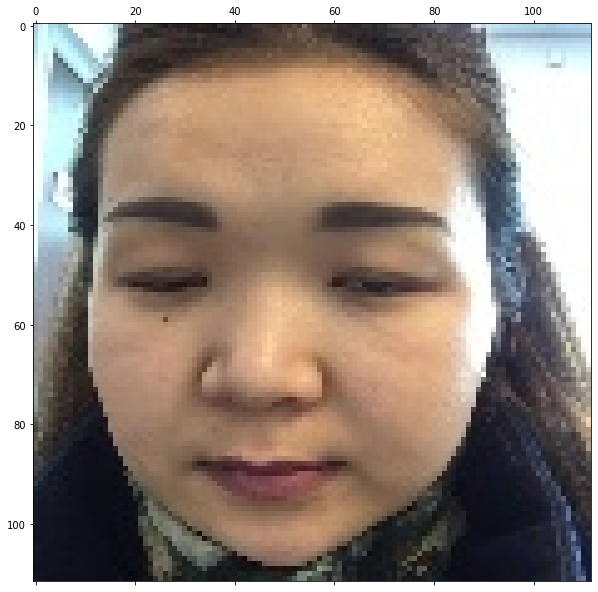

974
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0069.jpg
confidence =  0.0
blink =  0.9999912
const_left =  0.4482758620674198
const_right =  0.2857142857132653
const_left2 =  0.9298245613994305
const_right2 =  0.9224489795880717




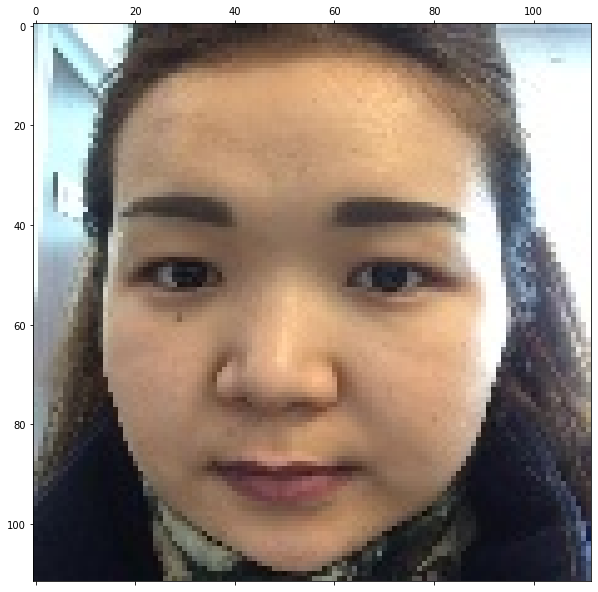

975
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0011.jpg
confidence =  0.5617978
blink =  9.497774e-06
const_left =  0.9310344827554105
const_right =  0.7857142857114796
const_left2 =  0.9780701754343066
const_right2 =  0.9714285714246064




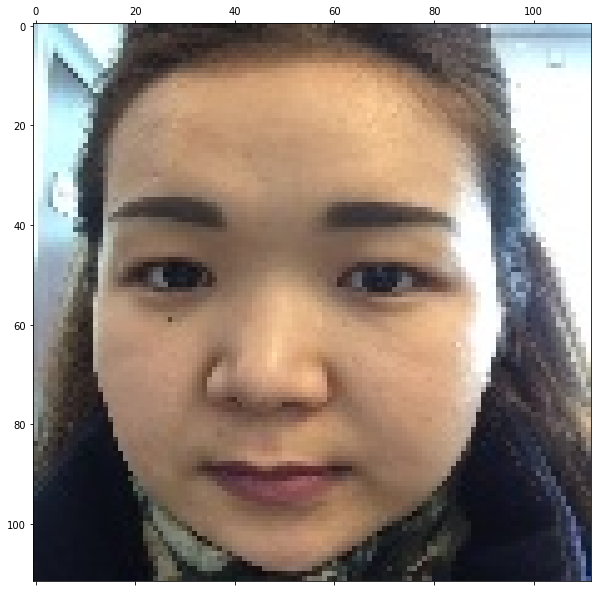

976
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0050.jpg
confidence =  0.5286448
blink =  2.6858472e-05
const_left =  0.9310344827554105
const_right =  0.9999999999964286
const_left2 =  0.9605263157852608
const_right2 =  0.9510204081593836




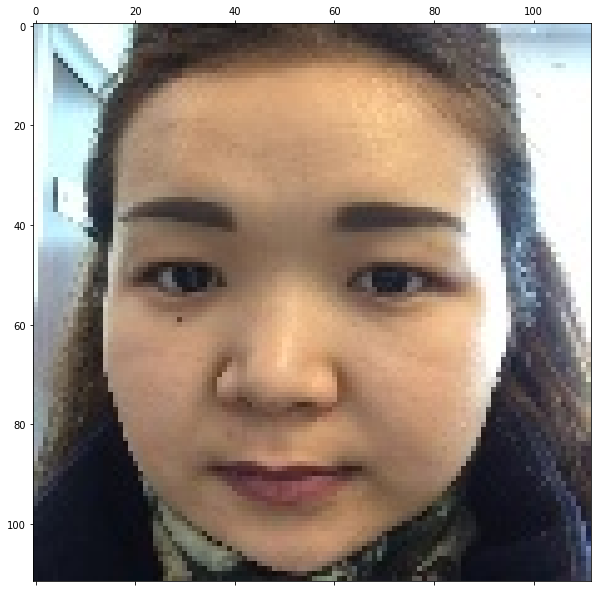

977
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0002.jpg
confidence =  0.5253631
blink =  1.5264974e-05
const_left =  0.9310344827554105
const_right =  0.8571428571397959
const_left2 =  0.9692982456097837
const_right2 =  0.9469387755063391




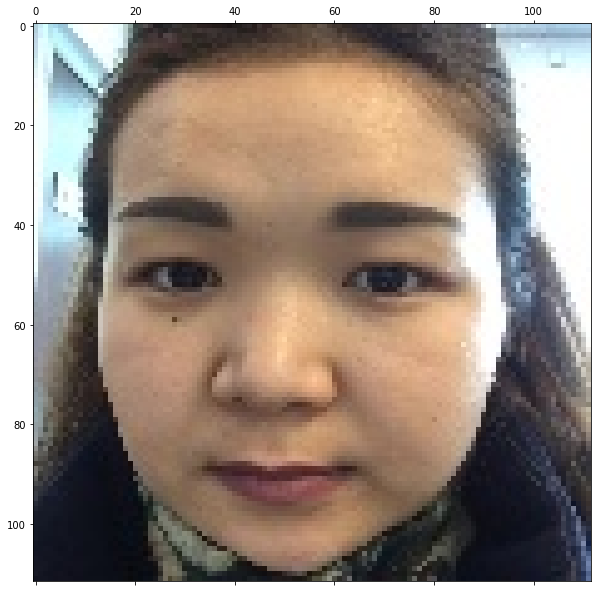

978
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0045.jpg
confidence =  0.5216775
blink =  1.4977352e-05
const_left =  0.9310344827554105
const_right =  0.8214285714256377
const_left2 =  0.9736842105220452
const_right2 =  0.9551020408124282




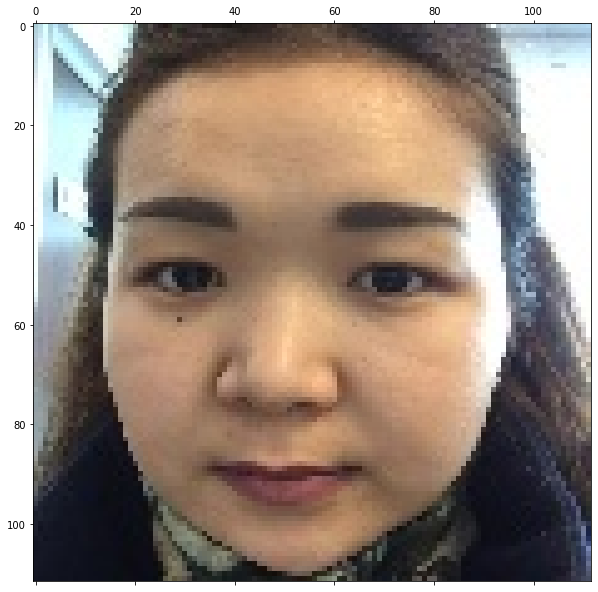

979
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0001.jpg
confidence =  0.54609287
blink =  1.1477904e-05
const_left =  0.9310344827554105
const_right =  0.8571428571397959
const_left2 =  0.9692982456097837
const_right2 =  0.9551020408124282




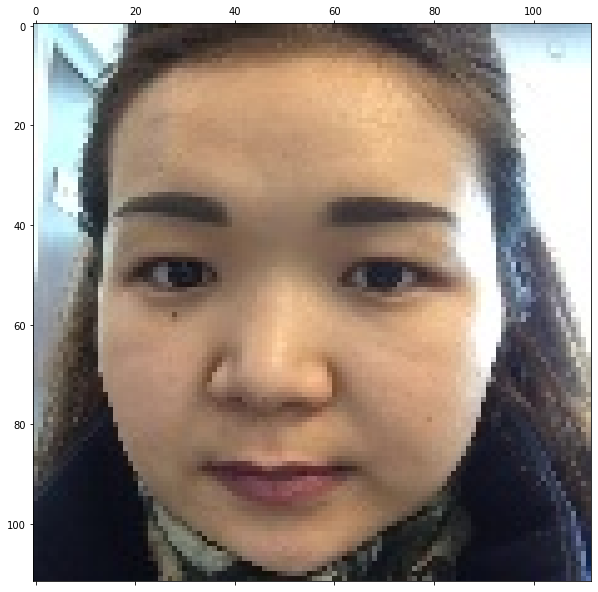

980
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0020.jpg
confidence =  0.52785397
blink =  1.7202741e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.991228070171091
const_right2 =  0.975510204077651




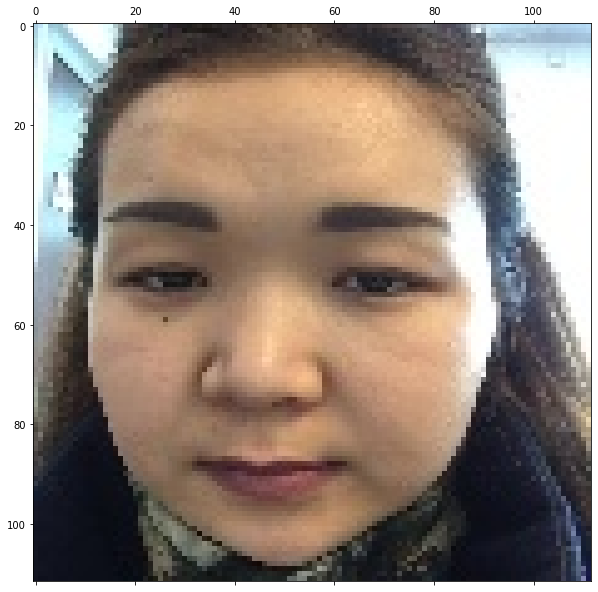

981
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0071.jpg
confidence =  0.5017149
blink =  0.00075756904
const_left =  0.6551724137908443
const_right =  0.5714285714265306
const_left2 =  0.9298245613994305
const_right2 =  0.9142857142819826




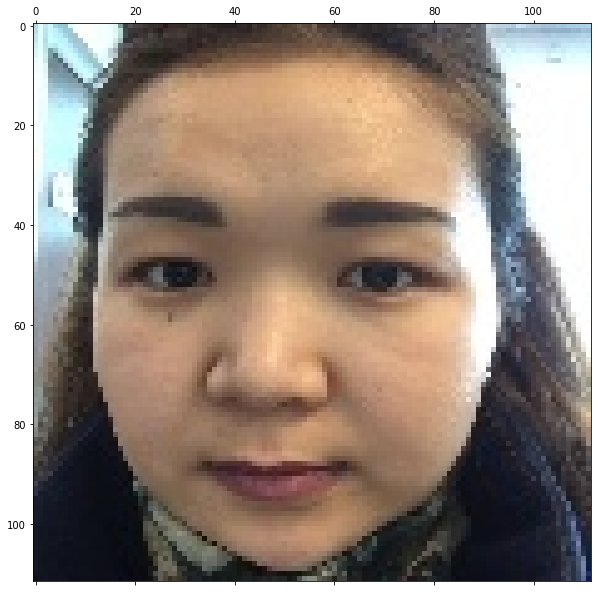

982
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0083.jpg
confidence =  0.546708
blink =  1.6982816e-05
const_left =  0.9310344827554105
const_right =  0.8571428571397959
const_left2 =  0.9692982456097837
const_right2 =  0.9795918367306955




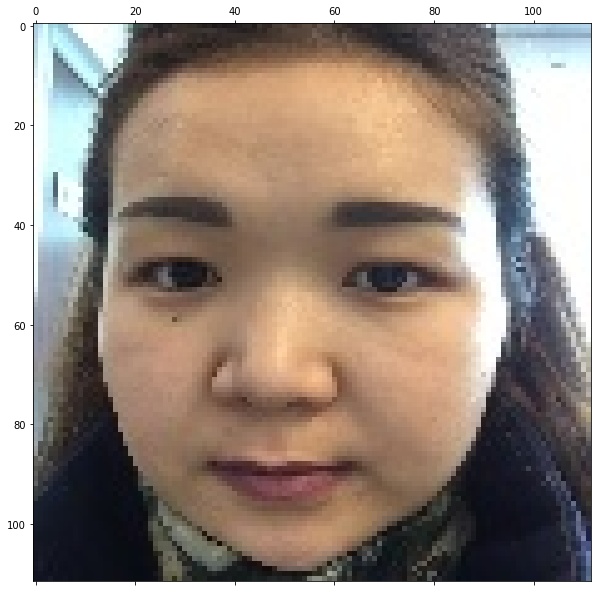

983
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0031.jpg
confidence =  0.5446961
blink =  1.4939762e-05
const_left =  0.9310344827554105
const_right =  0.8214285714256377
const_left2 =  0.9824561403465681
const_right2 =  0.9714285714246064




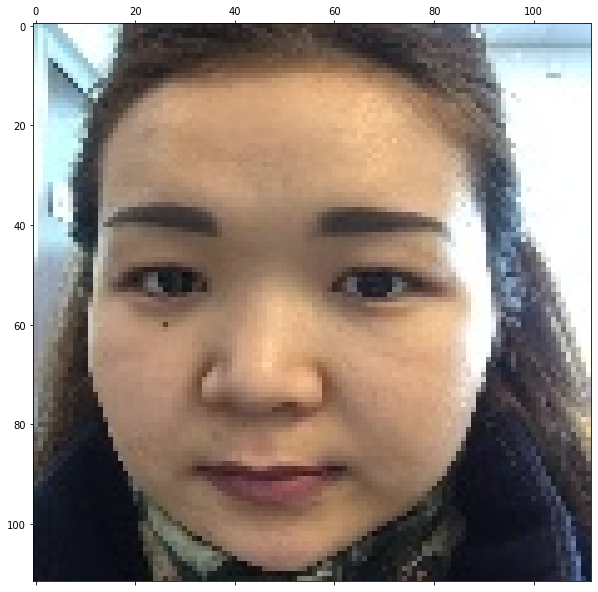

984
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0060.jpg
confidence =  0.48464483
blink =  3.1971747e-05
const_left =  0.8620689655142688
const_right =  0.9285714285681124
const_left2 =  0.9605263157852608
const_right2 =  0.9551020408124282




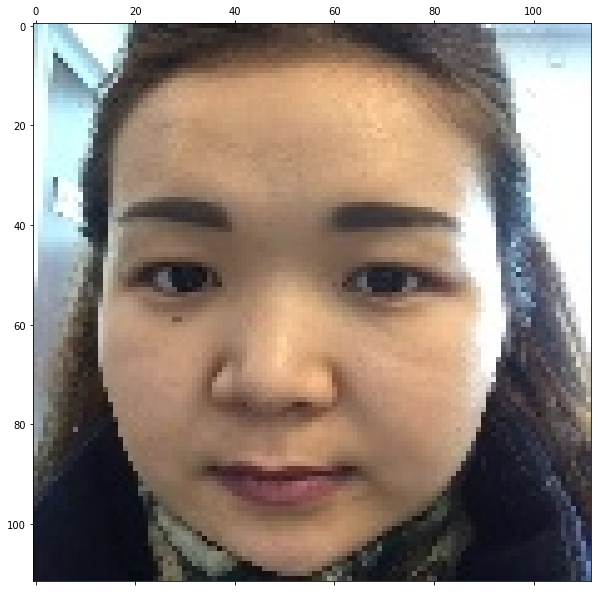

985
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0036.jpg
confidence =  0.53221005
blink =  1.8234341e-05
const_left =  0.8620689655142688
const_right =  0.8214285714256377
const_left2 =  0.9780701754343066
const_right2 =  0.9551020408124282




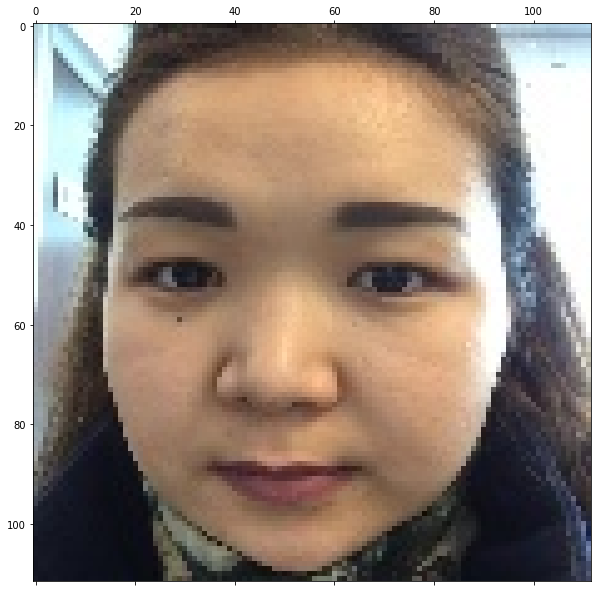

986
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0004.jpg
confidence =  0.5629829
blink =  8.367669e-06
const_left =  0.9310344827554105
const_right =  0.9999999999964286
const_left2 =  0.9649122806975222
const_right2 =  0.9591836734654726




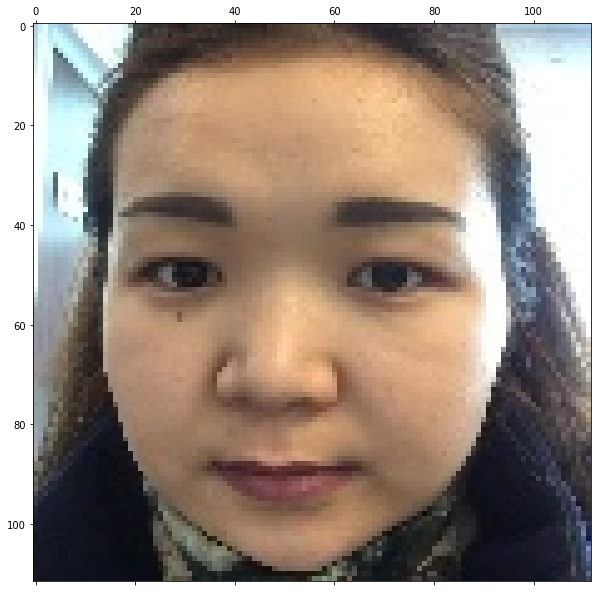

987
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0010.jpg
confidence =  0.5497489
blink =  9.116814e-06
const_left =  0.9310344827554105
const_right =  0.8571428571397959
const_left2 =  0.9868421052588296
const_right2 =  0.9999999999959184




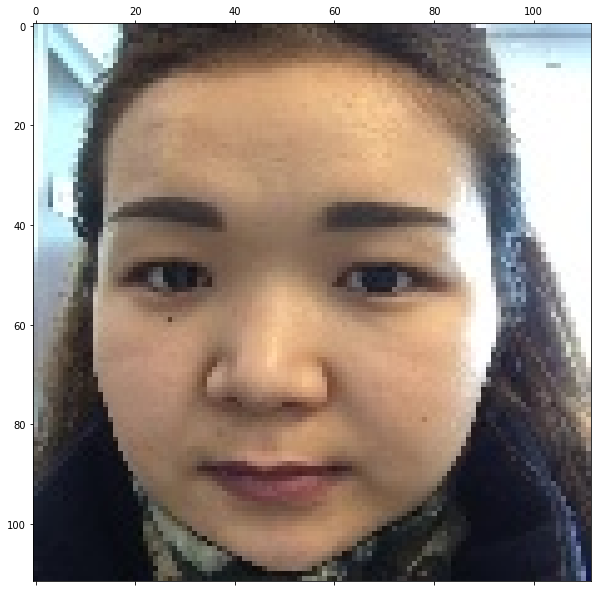

988
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0086.jpg
confidence =  0.53130686
blink =  1.3820082e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9736842105220452
const_right2 =  0.9632653061185172




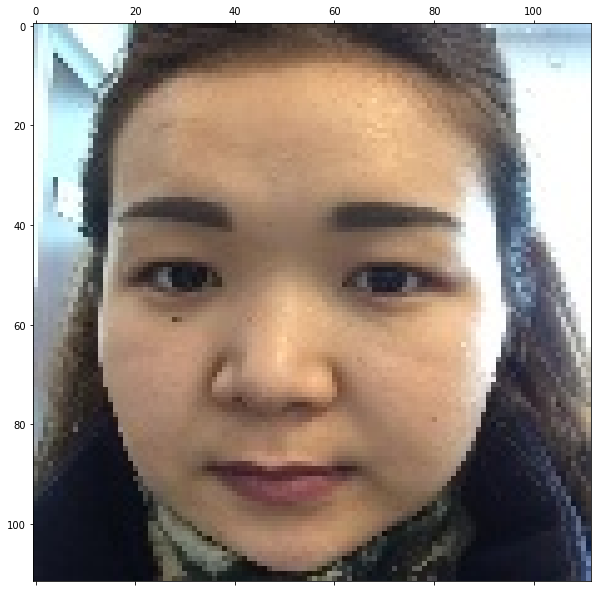

989
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0037.jpg
confidence =  0.53148377
blink =  1.3290573e-05
const_left =  0.9310344827554105
const_right =  0.8214285714256377
const_left2 =  0.9824561403465681
const_right2 =  0.9591836734654726




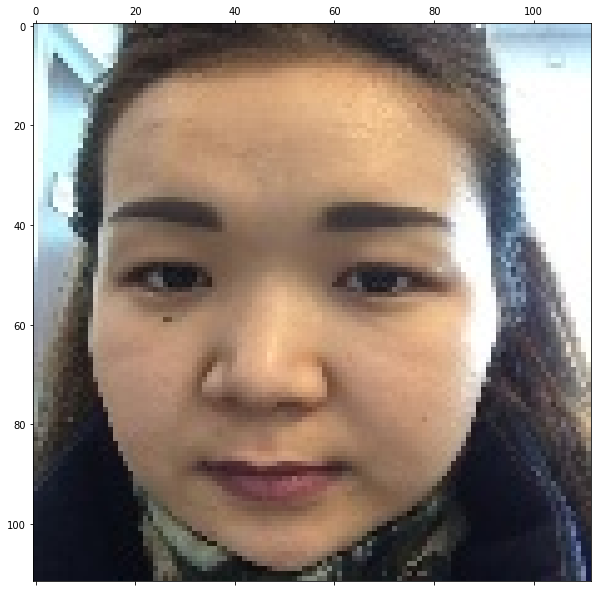

990
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0075.jpg
confidence =  0.51596475
blink =  2.6750551e-05
const_left =  0.8620689655142688
const_right =  0.7857142857114796
const_left2 =  0.9561403508729993
const_right2 =  0.9551020408124282




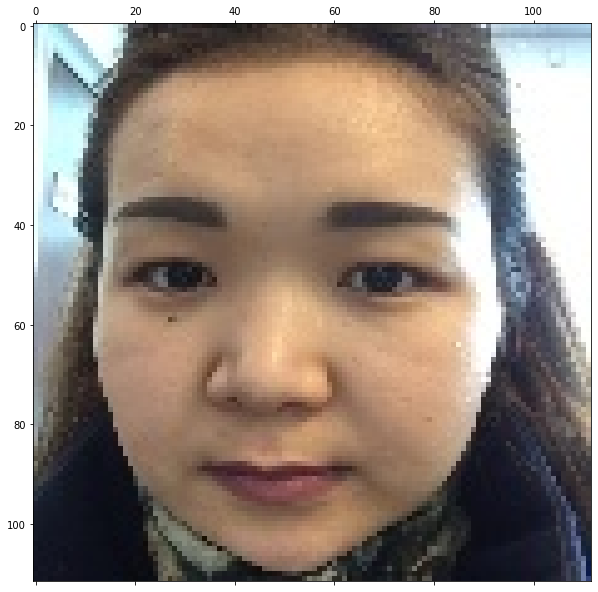

991
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0024.jpg
confidence =  0.53349656
blink =  2.2636166e-05
const_left =  0.9310344827554105
const_right =  0.8928571428539541
const_left2 =  0.9605263157852608
const_right2 =  0.9632653061185172




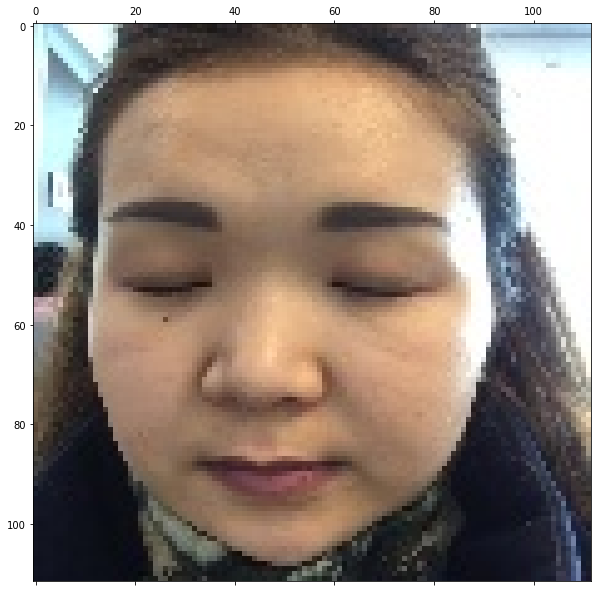

992
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0104.jpg
confidence =  0.0
blink =  1.0
const_left =  0.0689655172411415
const_right =  0.1428571428566326
const_left2 =  0.934210526311692
const_right2 =  0.9265306122411162




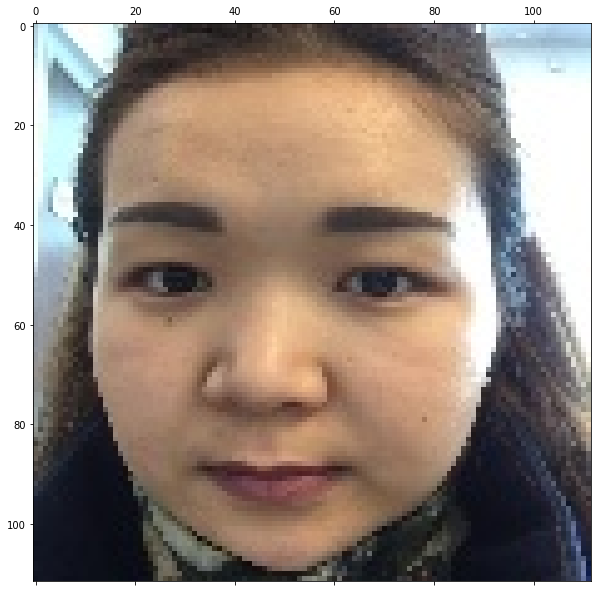

993
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0056.jpg
confidence =  0.50279224
blink =  2.789903e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9736842105220452
const_right2 =  0.9632653061185172




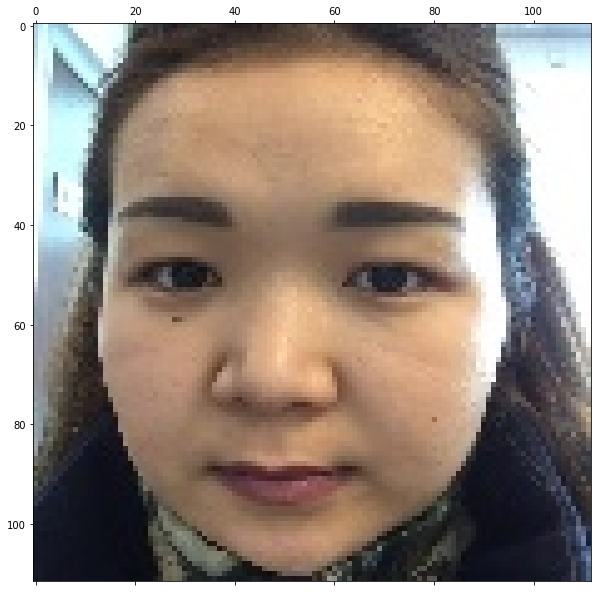

994
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0040.jpg
confidence =  0.5374329
blink =  9.3448125e-06
const_left =  0.9310344827554105
const_right =  0.9642857142822704
const_left2 =  0.9868421052588296
const_right2 =  0.9632653061185172




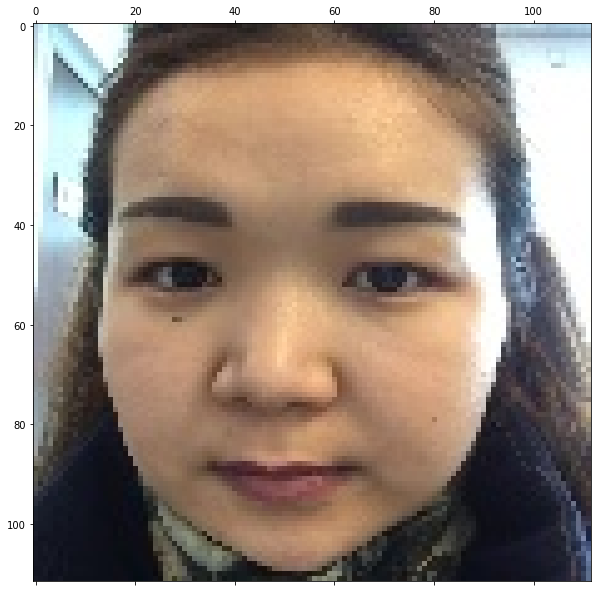

995
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0013.jpg
confidence =  0.5383774
blink =  1.5028145e-05
const_left =  0.9310344827554105
const_right =  0.8928571428539541
const_left2 =  0.9780701754343066
const_right2 =  0.9714285714246064




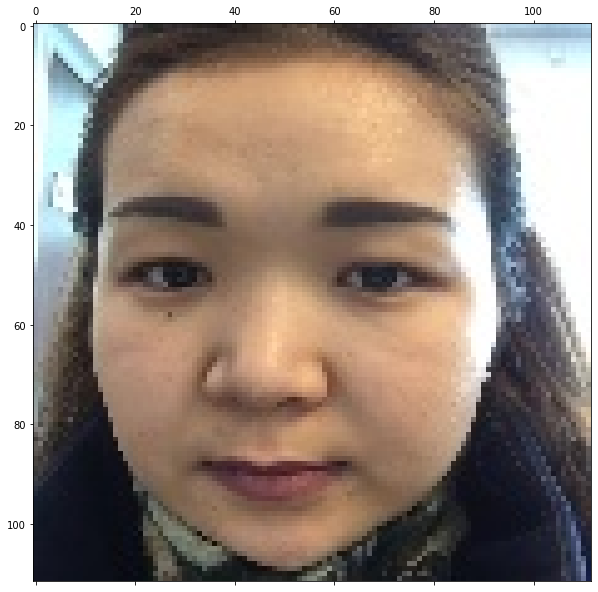

996
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0076.jpg
confidence =  0.52676356
blink =  2.0522442e-05
const_left =  0.7931034482731274
const_right =  0.7857142857114796
const_left2 =  0.9780701754343066
const_right2 =  0.9591836734654726




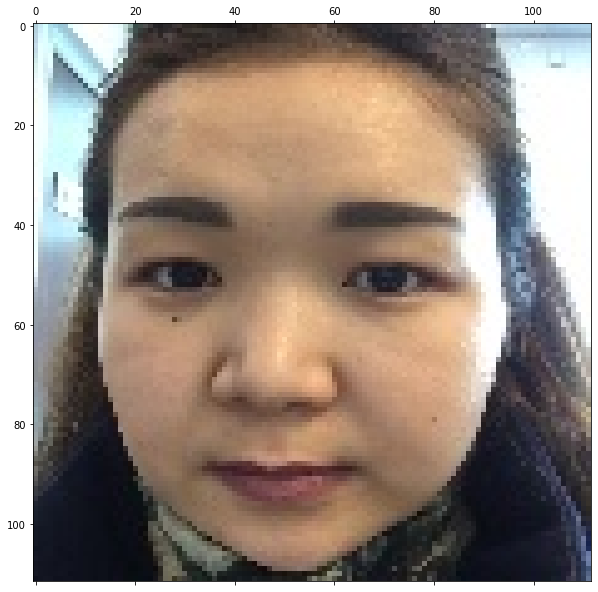

997
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0044.jpg
confidence =  0.5300953
blink =  1.2352031e-05
const_left =  0.9999999999965518
const_right =  0.9285714285681124
const_left2 =  0.9561403508729993
const_right2 =  0.9632653061185172




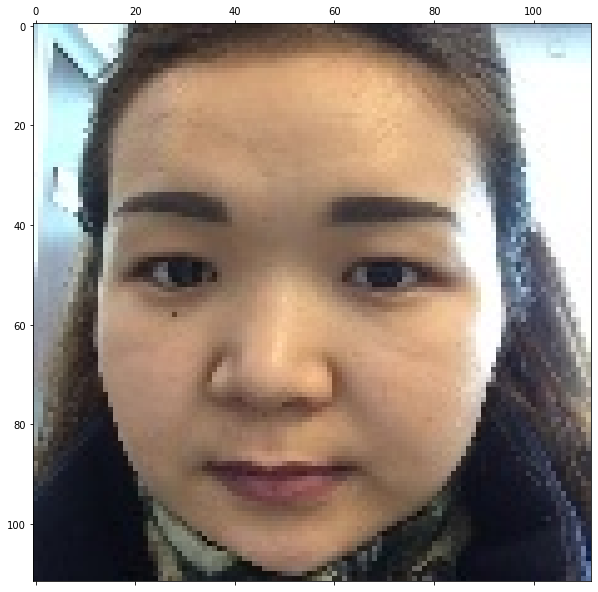

998
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0047.jpg
confidence =  0.536777
blink =  1.2633388e-05
const_left =  0.9310344827554105
const_right =  0.9285714285681124
const_left2 =  0.9780701754343066
const_right2 =  0.9673469387715617




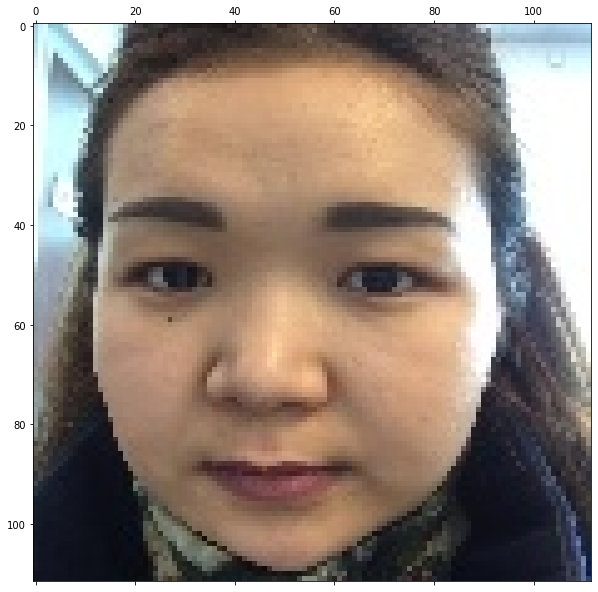

999
/mnt/data/frames/altyn_original_fps_igor_origami_extended_0003_112/c0c6ed2d-9f45-4d23-abe8-828d79296199/0052.jpg
confidence =  0.51749474
blink =  1.6773922e-05
const_left =  0.9310344827554105
const_right =  0.8928571428539541
const_left2 =  0.9605263157852608
const_right2 =  0.9673469387715617




In [24]:
plt.rcParams['figure.figsize'] = [10, 10]

for i,row in df[df.person_id=='c0c6ed2d-9f45-4d23-abe8-828d79296199'].iterrows():
    file = row['file']
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.matshow(img)
    plt.show()
    print(i)
    print(row['file'])
    #print('object =', row['object'])
    #print('low_resolution =', row['low_resolution'])
    print('confidence = ', row['confidence'])
    print('blink = ', row['blink'])
    print('const_left = ', row['const_left'])
    print('const_right = ', row['const_right'])
    print('const_left2 = ', row['const_left2'])
    print('const_right2 = ', row['const_right2'])
    print('\n')

<AxesSubplot:>

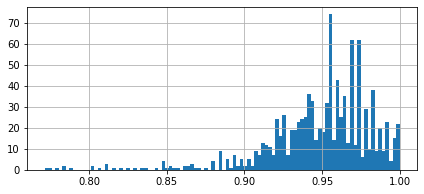

In [30]:
df['const_left2'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot:>

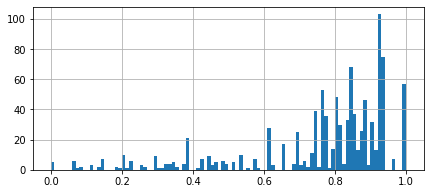

In [31]:
df['const_left'].hist(bins = 100, figsize = (7, 3))

<AxesSubplot:>

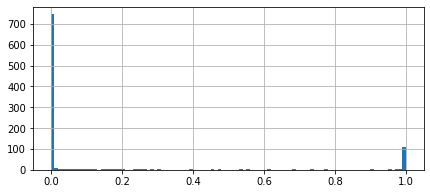

In [32]:
df['blink'].hist(bins = 100, figsize = (7, 3))